# DATOS DEL JUGADOR 3 PARA EL ACELEROMETRO

In [33]:
#librerias
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
import numpy as np
from scipy.signal import detrend
from fastdtw import dtw
import csv
from scipy.ndimage import gaussian_filter
import win32api
from scipy.signal import savgol_filter
from scipy.signal import medfilt
import pywt
from scipy.signal import detrend


In [34]:
# #El proceso puede requerir mas memoria de la que se dispone por lo que se amplia

# # Obtener el límite de uso de memoria virtual actual (en bytes)
# current_limit = win32api.GetProcessMemoryInfo(win32api.GetCurrentProcess())['PagefileUsage']
# print("Límite de uso de memoria virtual actual (en bytes):", current_limit)

# # Establecer un nuevo límite de uso de memoria virtual (en bytes)
# # Por ejemplo, establecer el límite en 20 GB (20 * 1024 * 1024 * 1024 bytes)
# new_limit = 20 * 1024 * 1024 * 1024
# win32api.SetProcessWorkingSetSize(win32api.GetCurrentProcess(), -1, new_limit)

# # Verificar que el límite de uso de memoria virtual se haya actualizado
# current_limit = win32api.GetProcessMemoryInfo(win32api.GetCurrentProcess())['PagefileUsage']
# print("Nuevo límite de uso de memoria virtual (en bytes):", current_limit)


In [35]:
#lectura como dataframe de todos los golpes del jugador 1 del acelerometro
df_dreta = pd.read_csv('C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/Proves Stroke Count/Jugador 3/Enregistraments J3/J3 Dretes ACC.csv')
df_reves = pd.read_csv('C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/Proves Stroke Count/Jugador 3/Enregistraments J3/J3 Reves ACC.csv')
df_serve = pd.read_csv('C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/Proves Stroke Count/Jugador 3/Enregistraments J3/J3 Serve ACC.csv')
df_smash = pd.read_csv('C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/Proves Stroke Count/Jugador 3/Enregistraments J3/J3 Smash ACC.csv')
df_vd = pd.read_csv('C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/Proves Stroke Count/Jugador 3/Enregistraments J3/J3 VD ACC.csv')
df_vr = pd.read_csv('C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/Proves Stroke Count/Jugador 3/Enregistraments J3/J3 VR ACC.csv')


In [36]:
#visualizamos las primeras lineas del dataframe
df_reves.head()

ACC_X     ACC_Y     ACC_Z                         DATE  UNIX_TIMESTAMP
0  0.047640  0.233786  0.015817  2023-10-21T14:56:38.727259Z   1697900198727
1  0.066889  0.292495  0.014628  2023-10-21T14:56:38.747586Z   1697900198747
2  0.098394  0.376610  0.012213  2023-10-21T14:56:38.767836Z   1697900198767
3  0.101938  0.369432  0.005543  2023-10-21T14:56:38.788002Z   1697900198787
4  0.072477  0.283692  0.005384  2023-10-21T14:56:38.808305Z   1697900198808

In [37]:
df_dreta.head()

ACC_X     ACC_Y     ACC_Z                         DATE  UNIX_TIMESTAMP
0  0.100641  0.227240  0.007434  2023-10-21T14:54:48.775215Z   1697900088775
1  0.090008  0.203765  0.006254  2023-10-21T14:54:48.790616Z   1697900088790
2  0.052402  0.123644  0.002249  2023-10-21T14:54:48.810950Z   1697900088810
3  0.032049  0.079304  0.001107  2023-10-21T14:54:48.831137Z   1697900088831
4  0.043650  0.105824  0.001480  2023-10-21T14:54:48.852568Z   1697900088852

In [38]:
df_serve.head()

ACC_X     ACC_Y     ACC_Z                         DATE  UNIX_TIMESTAMP
0  0.044265  0.290944  0.081991  2023-10-21T15:03:09.034724Z   1697900589034
1  0.047871  0.298416  0.086049  2023-10-21T15:03:09.054812Z   1697900589054
2  0.047758  0.269178  0.078086  2023-10-21T15:03:09.075116Z   1697900589075
3  0.041228  0.226329  0.064553  2023-10-21T15:03:09.095373Z   1697900589095
4  0.032655  0.189370  0.053739  2023-10-21T15:03:09.117291Z   1697900589117

In [39]:
df_smash.head()

ACC_X     ACC_Y     ACC_Z                         DATE  UNIX_TIMESTAMP
0  0.086506  0.113506  0.078434  2023-10-21T15:01:24.215531Z   1697900484215
1  0.053902  0.071044  0.048639  2023-10-21T15:01:24.235686Z   1697900484235
2 -0.019903 -0.026375 -0.017498  2023-10-21T15:01:24.257426Z   1697900484257
3 -0.094142 -0.126393 -0.081848  2023-10-21T15:01:24.276283Z   1697900484276
4 -0.123271 -0.166754 -0.106120  2023-10-21T15:01:24.296565Z   1697900484296

In [40]:
df_vd.head()

ACC_X     ACC_Y     ACC_Z                         DATE  UNIX_TIMESTAMP
0  0.175367  0.202951 -0.071890  2023-10-21T14:58:50.310881Z   1697900330310
1  0.125426  0.148734 -0.054231  2023-10-21T14:58:50.332201Z   1697900330332
2  0.096350  0.116407 -0.043957  2023-10-21T14:58:50.351759Z   1697900330351
3  0.112257  0.135550 -0.051054  2023-10-21T14:58:50.371794Z   1697900330371
4  0.147890  0.175287 -0.064657  2023-10-21T14:58:50.392023Z   1697900330391

In [41]:
df_vr.head()

ACC_X     ACC_Y     ACC_Z                         DATE  UNIX_TIMESTAMP
0  0.181921  0.236819 -0.072947  2023-10-21T14:59:41.840411Z   1697900381840
1  0.132570  0.174380 -0.051697  2023-10-21T14:59:41.864166Z   1697900381864
2  0.120600  0.157857 -0.047812  2023-10-21T14:59:41.881016Z   1697900381880
3  0.128583  0.166806 -0.051063  2023-10-21T14:59:41.901259Z   1697900381901
4  0.175681  0.225005 -0.072790  2023-10-21T14:59:41.921513Z   1697900381921

In [42]:
#eliminamos la columna Date de todos los df ya que solo usaremos el Unixtimestamp
df_dreta = df_dreta.drop(columns=['DATE'])
df_reves = df_reves.drop(columns=['DATE'])
df_serve = df_serve.drop(columns=['DATE'])
df_smash = df_smash.drop(columns=['DATE'])
df_vd = df_vd.drop(columns=['DATE'])
df_vr = df_vr.drop(columns=['DATE'])

In [43]:
#vemos efectivamente que la columna se ha eliminado
df_dreta.head()

ACC_X     ACC_Y     ACC_Z  UNIX_TIMESTAMP
0  0.100641  0.227240  0.007434   1697900088775
1  0.090008  0.203765  0.006254   1697900088790
2  0.052402  0.123644  0.002249   1697900088810
3  0.032049  0.079304  0.001107   1697900088831
4  0.043650  0.105824  0.001480   1697900088852

In [44]:
#busqueda NAs y Nulos

In [45]:
# Convertir el diccionario a un DataFrame
df = pd.DataFrame(df_dreta)

# Buscar NaNs
nan_count = df.isna().sum()

# Buscar ceros
zero_count = (df == 0).sum()

# Mostrar resultados
print("Conteo de valores NaN por columna:")
print(nan_count)
print("\nConteo de ceros por columna:")
print(zero_count)

Conteo de valores NaN por columna:
ACC_X             0
ACC_Y             0
ACC_Z             0
UNIX_TIMESTAMP    0
dtype: int64

Conteo de ceros por columna:
ACC_X             0
ACC_Y             0
ACC_Z             0
UNIX_TIMESTAMP    0
dtype: int64


In [46]:
#Outliers

In [47]:

# Convertir el diccionario a un DataFrame
df = pd.DataFrame(df_dreta)

# Función para detectar outliers usando el método IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Detectar outliers en cada columna
outliers_acc_z = detect_outliers_iqr(df['ACC_Z'])

# Mostrar resultados
print("Outliers en ACC_Z:")
print(outliers_acc_z)
print(len(outliers_acc_z))


Outliers en ACC_Z:
268    -0.635056
269    -0.740555
270    -0.843697
271    -0.945950
272    -1.050057
          ...   
4799   -0.899348
4800   -0.882215
4801   -0.835827
4802   -0.761887
4803   -0.664065
Name: ACC_Z, Length: 1058, dtype: float64
1058


In [48]:
# Detectar outliers en cada columna
outliers_acc_y = detect_outliers_iqr(df['ACC_Y'])

# Mostrar resultados
print("Outliers en ACC_Y:")
print(outliers_acc_y)
print(len(outliers_acc_y))


Outliers en ACC_Y:
268     0.950426
269     1.022809
270     1.074656
271     1.109006
272     1.130822
          ...   
4813   -0.681085
4814   -0.719260
4815   -0.717157
4816   -0.680884
4817   -0.619598
Name: ACC_Y, Length: 574, dtype: float64
574


In [49]:
# Detectar outliers en cada columna
outliers_acc_x = detect_outliers_iqr(df['ACC_X'])

# Mostrar resultados
print("Outliers en ACC_X:")
print(outliers_acc_x)
print(len(outliers_acc_x))


Outliers en ACC_X:
294    -1.411798
295    -1.682343
296    -1.951519
297    -2.203041
298    -2.411779
          ...   
4799    2.599868
4800    2.518742
4801    2.355646
4802    2.119666
4803    1.824318
Name: ACC_X, Length: 784, dtype: float64
784


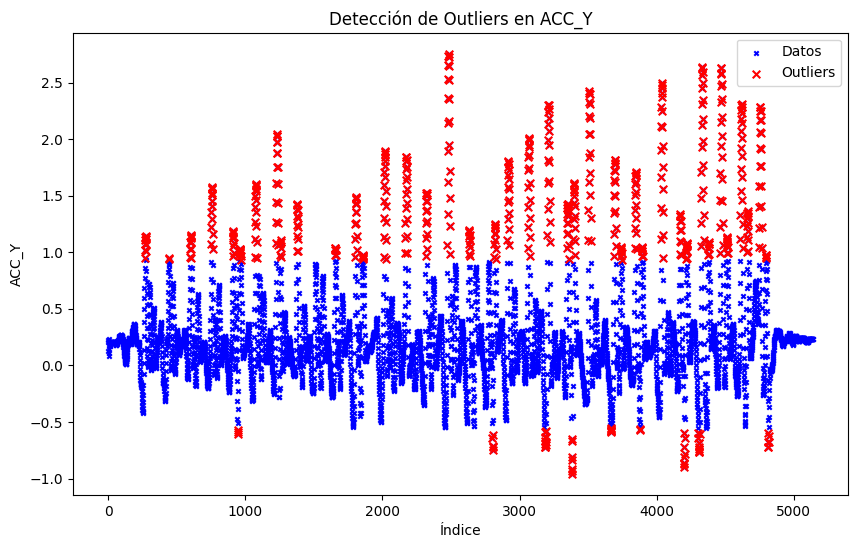

In [50]:

# Graficar los puntos y resaltar los outliers con cruces pequeñas
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['ACC_Y'], label='Datos', color='blue', s=10, marker='x')
plt.scatter(outliers_acc_y.index, outliers_acc_y, label='Outliers', color='red', s=30, marker='x')
plt.xlabel('Índice')
plt.ylabel('ACC_Y')
plt.title('Detección de Outliers en ACC_Y')
plt.legend()
plt.show()

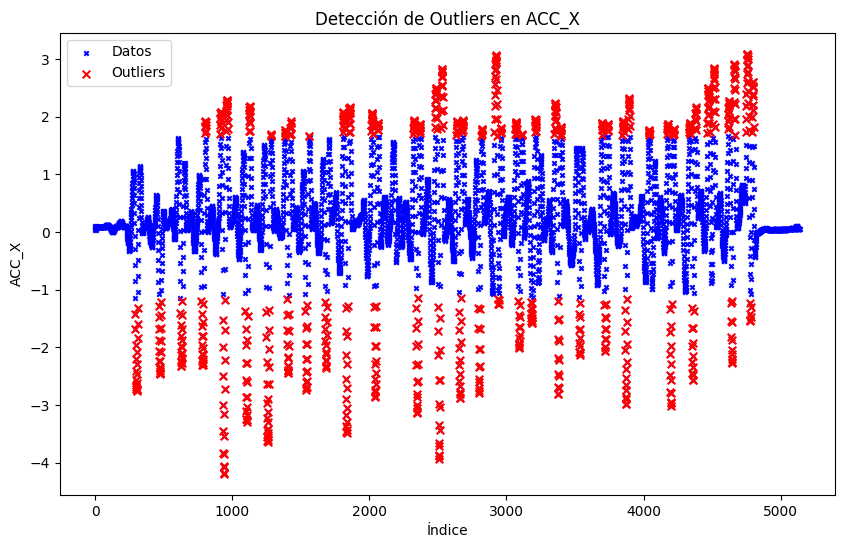

In [51]:

# Graficar los puntos y resaltar los outliers con cruces pequeñas
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['ACC_X'], label='Datos', color='blue', s=10, marker='x')
plt.scatter(outliers_acc_x.index, outliers_acc_x, label='Outliers', color='red', s=30, marker='x')
plt.xlabel('Índice')
plt.ylabel('ACC_X')
plt.title('Detección de Outliers en ACC_X')
plt.legend()
plt.show()

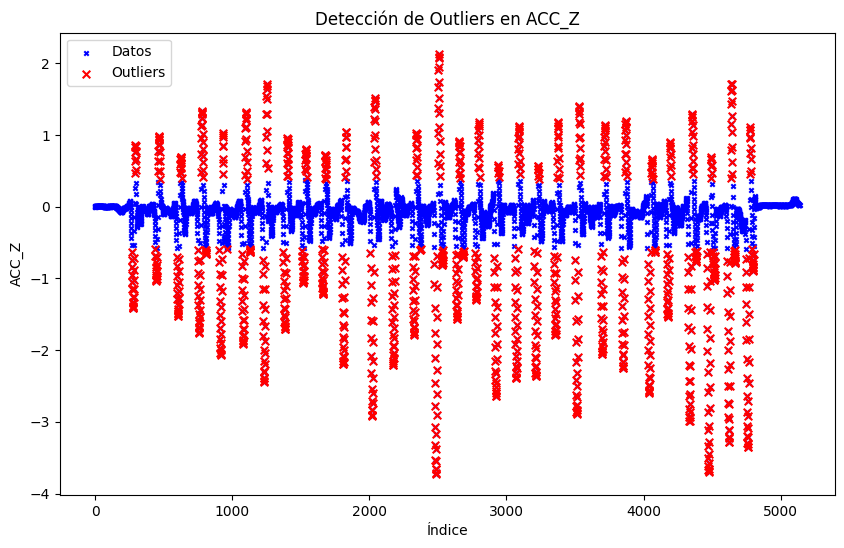

In [52]:

# Graficar los puntos y resaltar los outliers con cruces pequeñas
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['ACC_Z'], label='Datos', color='blue', s=10, marker='x')
plt.scatter(outliers_acc_z.index, outliers_acc_z, label='Outliers', color='red', s=30, marker='x')
plt.xlabel('Índice')
plt.ylabel('ACC_Z')
plt.title('Detección de Outliers en ACC_Z')
plt.legend()
plt.show()

In [53]:

# Definir el tipo de dato para cada columna
dtype = [('ACC_X', float), ('ACC_Y', float), ('ACC_Z', float), ('UNIX_TIMESTAMP', int)]

# Convertir el DataFrame a un array NumPy con tipos de datos específicos
array_dreta = np.array(df_dreta.to_records(index=False), dtype=dtype)

array_reves = np.array(df_reves.to_records(index=False), dtype=dtype)

array_serve = np.array(df_serve.to_records(index=False), dtype=dtype)

array_smash = np.array(df_smash.to_records(index=False), dtype=dtype)

array_vd = np.array(df_vd.to_records(index=False), dtype=dtype)

array_vr = np.array(df_vr.to_records(index=False), dtype=dtype)



In [54]:
array_vr['UNIX_TIMESTAMP']

array([1388299920, 1388299944, 1388299960, ..., 1388362516, 1388362535,
       1388362555])

In [55]:
#GRAFICAMOS TODOS LOS EJES PARA TENER UNA PRIMERA VISUALIZACION

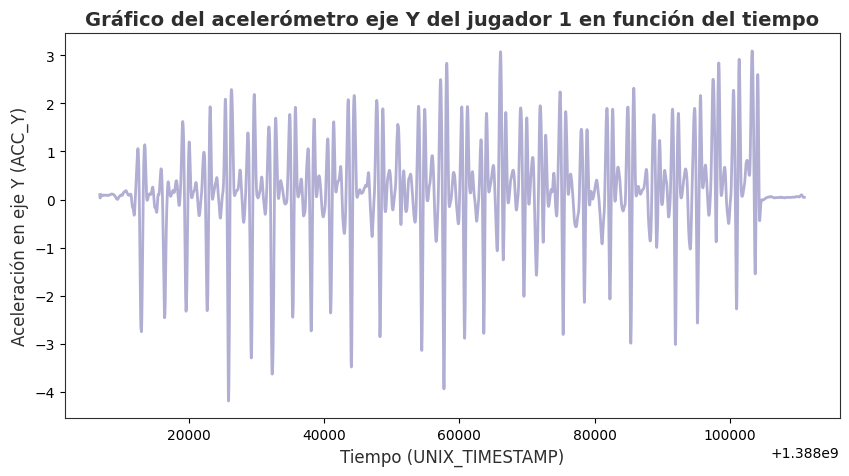

In [56]:

# Extraer los datos
acc_x = array_dreta['ACC_X']
unix_timestamp = array_dreta['UNIX_TIMESTAMP']

# Crear el gráfico
plt.figure(figsize=(10, 5))

# Personalizar el gráfico con una línea de tendencia
plt.plot(unix_timestamp, acc_x, linestyle='-', linewidth=2, color='#9e9ac8', alpha=0.8)

# Agregar título y etiquetas
plt.title('Gráfico del acelerómetro eje Y del jugador 1 en función del tiempo', fontsize=14, fontweight='bold', color='#2e2e2e')
plt.xlabel('Tiempo (UNIX_TIMESTAMP)', fontsize=12, color='#2e2e2e')
plt.ylabel('Aceleración en eje Y (ACC_Y)', fontsize=12, color='#2e2e2e')

# Cambiar el color de los ejes
plt.gca().spines['bottom'].set_color('#2e2e2e')
plt.gca().spines['top'].set_color('#2e2e2e')
plt.gca().spines['left'].set_color('#2e2e2e')
plt.gca().spines['right'].set_color('#2e2e2e')

# Ocultar la cuadrícula de fondo
plt.grid(False)

# Mostrar el gráfico
plt.show()

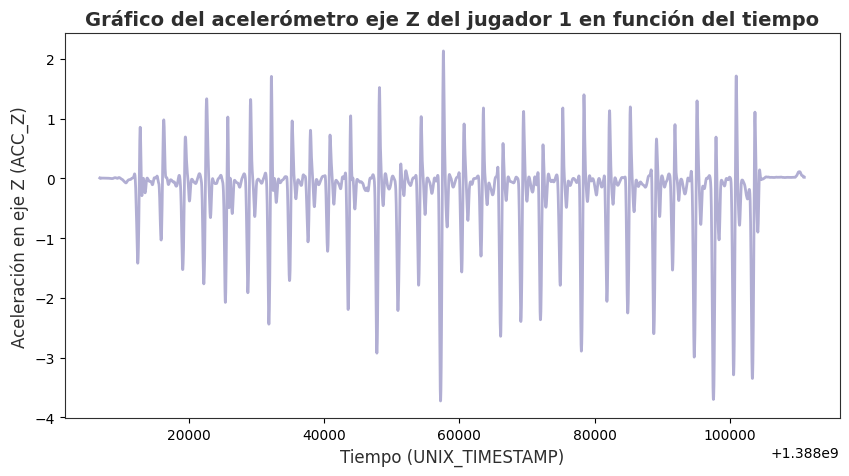

In [57]:
# Extraer los datos
acc_z = array_dreta['ACC_Z']
unix_timestamp = array_dreta['UNIX_TIMESTAMP']

# Crear el gráfico
plt.figure(figsize=(10, 5))

# Personalizar el gráfico con una línea de tendencia
plt.plot(unix_timestamp, acc_z, linestyle='-', linewidth=2, color='#9e9ac8', alpha=0.8)

# Agregar título y etiquetas
plt.title('Gráfico del acelerómetro eje Z del jugador 1 en función del tiempo', fontsize=14, fontweight='bold', color='#2e2e2e')
plt.xlabel('Tiempo (UNIX_TIMESTAMP)', fontsize=12, color='#2e2e2e')
plt.ylabel('Aceleración en eje Z (ACC_Z)', fontsize=12, color='#2e2e2e')

# Cambiar el color de los ejes
plt.gca().spines['bottom'].set_color('#2e2e2e')
plt.gca().spines['top'].set_color('#2e2e2e')
plt.gca().spines['left'].set_color('#2e2e2e')
plt.gca().spines['right'].set_color('#2e2e2e')

# Ocultar la cuadrícula de fondo
plt.grid(False)

# Mostrar el gráfico
plt.show()

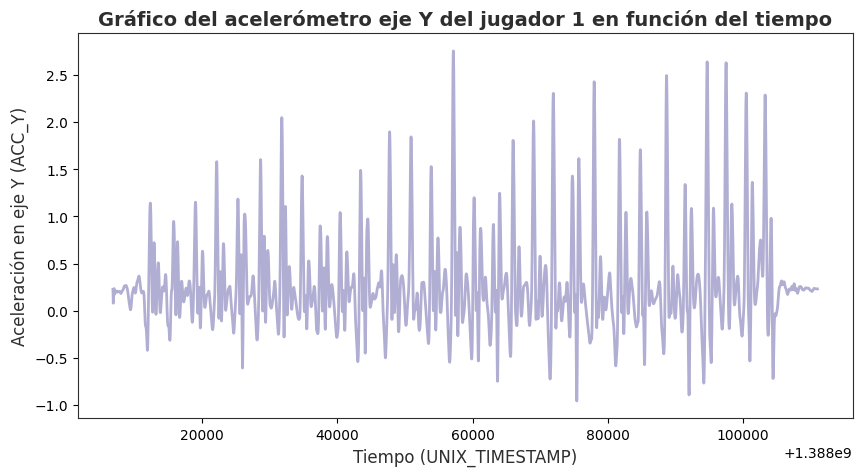

In [58]:
# Extraer los datos
acc_y = array_dreta['ACC_Y']
unix_timestamp = array_dreta['UNIX_TIMESTAMP']

# Crear el gráfico
plt.figure(figsize=(10, 5))

# Personalizar el gráfico con una línea de tendencia
plt.plot(unix_timestamp, acc_y, linestyle='-', linewidth=2, color='#9e9ac8', alpha=0.8)

# Agregar título y etiquetas
plt.title('Gráfico del acelerómetro eje Y del jugador 1 en función del tiempo', fontsize=14, fontweight='bold', color='#2e2e2e')
plt.xlabel('Tiempo (UNIX_TIMESTAMP)', fontsize=12, color='#2e2e2e')
plt.ylabel('Aceleración en eje Y (ACC_Y)', fontsize=12, color='#2e2e2e')

# Cambiar el color de los ejes
plt.gca().spines['bottom'].set_color('#2e2e2e')
plt.gca().spines['top'].set_color('#2e2e2e')
plt.gca().spines['left'].set_color('#2e2e2e')
plt.gca().spines['right'].set_color('#2e2e2e')

# Ocultar la cuadrícula de fondo
plt.grid(False)

# Mostrar el gráfico
plt.show()

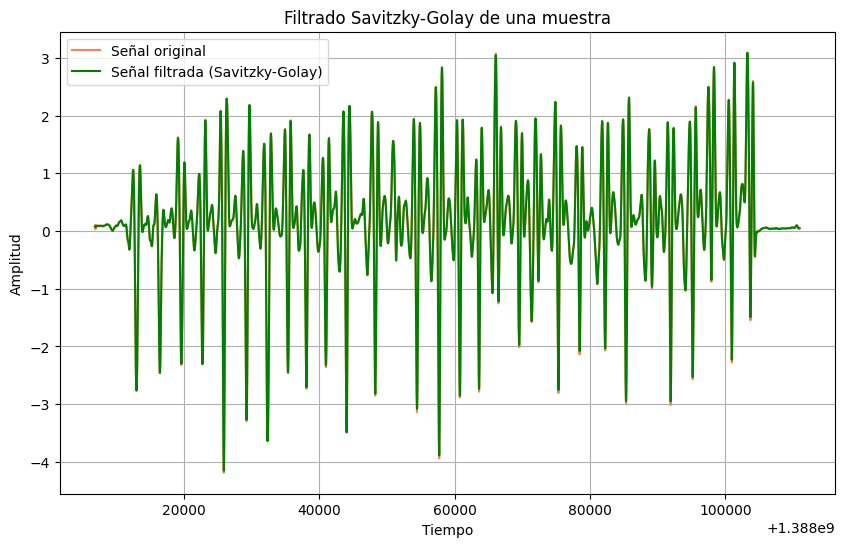

In [59]:


# Aplicar el filtrado Savitzky-Golay a la segunda columna de la muestra
filtered_signal_savgol = savgol_filter(acc_x, window_length=13, polyorder=2)

# Graficar la señal original y la señal filtrada con Savitzky-Golay
plt.figure(figsize=(10, 6))
plt.plot(unix_timestamp, acc_x, label='Señal original',  color='coral')
plt.plot(unix_timestamp, filtered_signal_savgol, label='Señal filtrada (Savitzky-Golay)',  color='green')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Filtrado Savitzky-Golay de una muestra')
plt.legend()
plt.grid(True)
plt.show()


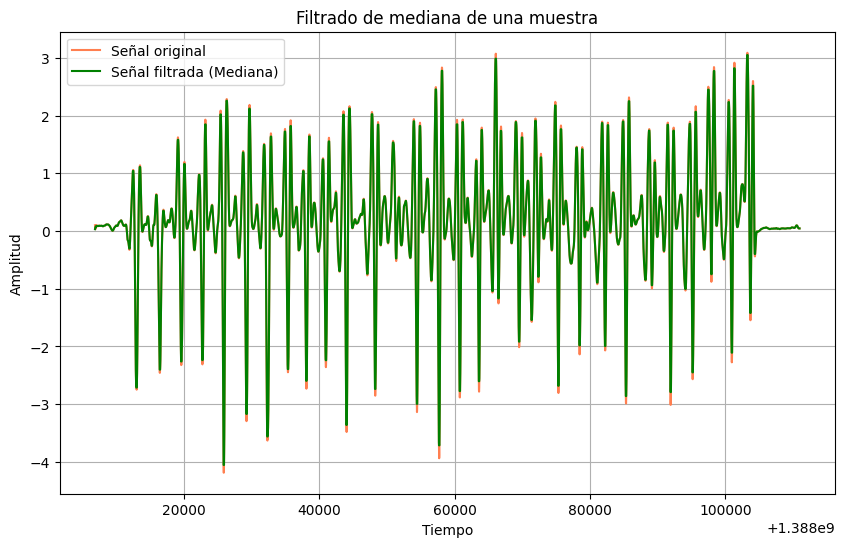

In [60]:

# Aplicar el filtrado de mediana a la segunda columna de la muestra
filtered_signal_medfilt = medfilt(acc_x, kernel_size=7)  # El tamaño del kernel debe ser impar

# Graficar la señal original y la señal filtrada con mediana
plt.figure(figsize=(10, 6))
plt.plot(unix_timestamp, acc_x, label='Señal original',  color='coral')
plt.plot(unix_timestamp, filtered_signal_medfilt, label='Señal filtrada (Mediana)',  color='green')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Filtrado de mediana de una muestra')
plt.legend()
plt.grid(True)
plt.show()


In [61]:

# # Definir el nivel de descomposición y la wavelet a utilizar
# level = 5
# wavelet = 'db4'

# # Aplicar wavelet denoising a la segunda columna de la muestra
# coeffs = pywt.wavedec(acc_x, wavelet, level=level)
# coeffs[1:] = (pywt.threshold(detail, value=0.1, mode='soft') for detail in coeffs[1:])
# filtered_signal_wavelet = pywt.waverec(coeffs, wavelet)

# # Graficar la señal original y la señal filtrada con wavelet denoising
# plt.figure(figsize=(10, 6))
# plt.plot(unix_timestamp, acc_x, label='Señal original',  color='coral')
# plt.plot(unix_timestamp, filtered_signal_wavelet, label='Señal filtrada (Wavelet)',  color='green' )
# plt.xlabel('Tiempo')
# plt.ylabel('Amplitud')
# plt.title('Filtrado de Wavelet de una muestra')
# plt.legend()
# plt.grid(True)
# plt.show()


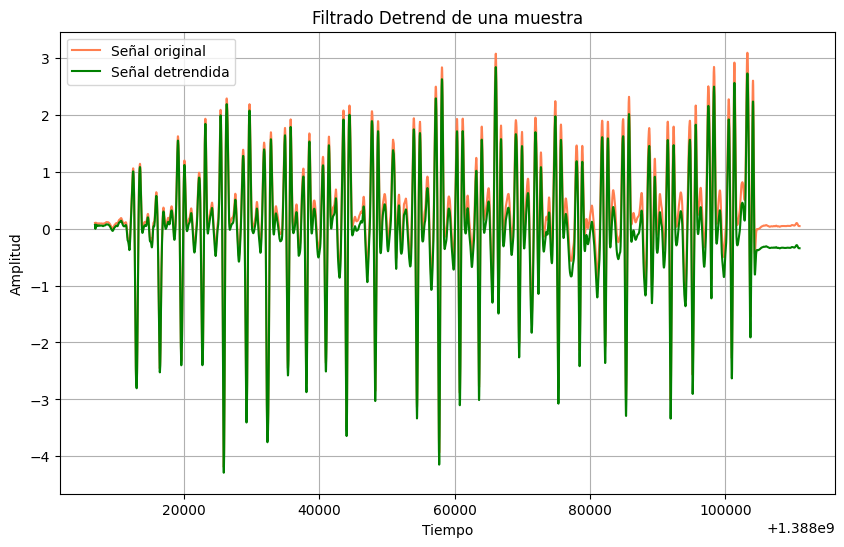

In [62]:
# Aplicar el filtrado detrend a la señal
detrended_signal = detrend(acc_x)

# Graficar la señal original y la señal detrendida
plt.figure(figsize=(10, 6))
plt.plot(unix_timestamp, acc_x, label='Señal original',  color='coral')
plt.plot(unix_timestamp, detrended_signal, label='Señal detrendida',  color='green')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Filtrado Detrend de una muestra')
plt.legend()
plt.grid(True)
plt.show()

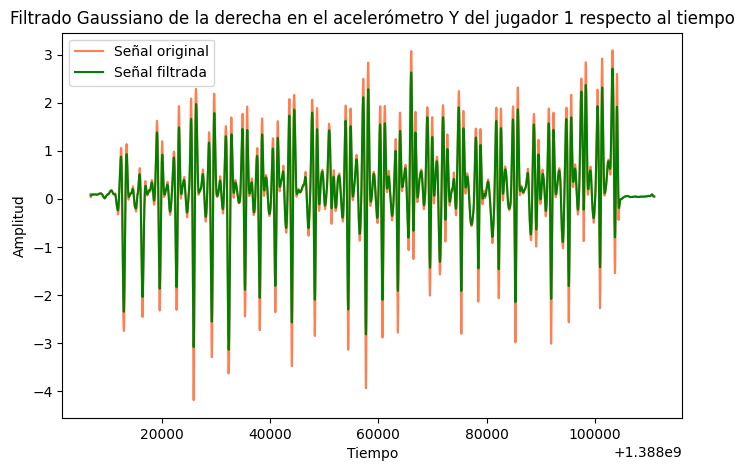

In [63]:

# Aplicar un filtro gaussiano a la señal ACC_X
filtered_signal = gaussian_filter(array_dreta['ACC_X'], sigma=5)  # sigma es el parámetro que controla el ancho del filtro gaussiano

# Graficar la señal original y la señal filtrada
plt.figure(figsize=(8, 5))
plt.plot(array_dreta['UNIX_TIMESTAMP'], array_dreta['ACC_X'], label='Señal original', color='coral')
plt.plot(array_dreta['UNIX_TIMESTAMP'], filtered_signal, label='Señal filtrada', color='green')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Filtrado Gaussiano de la derecha en el acelerómetro Y del jugador 1 respecto al tiempo')
plt.legend()
plt.grid(False)  # Quitar la cuadrícula del fondo
plt.show()

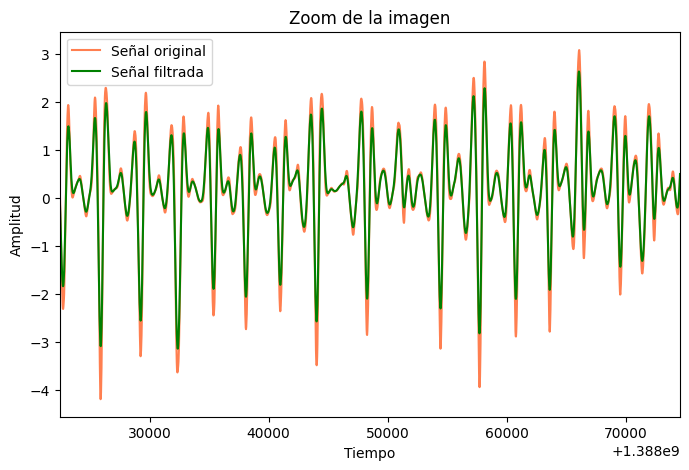

In [64]:

# Calcular el rango del 10% central de la muestra
total_points = len(array_dreta['UNIX_TIMESTAMP'])
start_index = int(total_points * 0.15)  # Inicio del 10% central
end_index = int(total_points * 0.65)    # Fin del 10% central

# Aplicar un filtro gaussiano a la señal ACC_X
filtered_signal = gaussian_filter(array_dreta['ACC_X'], sigma=5)  # sigma es el parámetro que controla el ancho del filtro gaussiano

# Graficar la señal original y la señal filtrada
plt.figure(figsize=(8, 5))
plt.plot(array_dreta['UNIX_TIMESTAMP'], array_dreta['ACC_X'], label='Señal original', color='coral')
plt.plot(array_dreta['UNIX_TIMESTAMP'], filtered_signal, label='Señal filtrada', color='green')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Zoom de la imagen')
plt.legend()
plt.grid(False)  # Quitar la cuadrícula del fondo

# Limitar el eje x al 10% central de la muestra
plt.xlim(array_dreta['UNIX_TIMESTAMP'][start_index], array_dreta['UNIX_TIMESTAMP'][end_index])

plt.show()

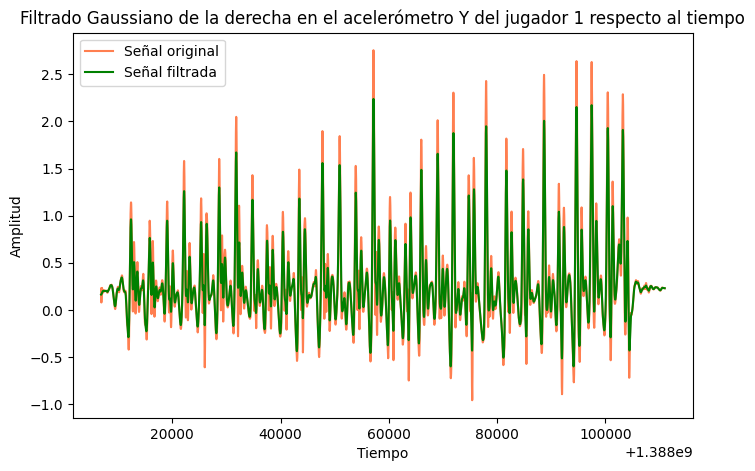

In [65]:

# Aplicar un filtro gaussiano a la señal ACC_Y
filtered_signal = gaussian_filter(array_dreta['ACC_Y'], sigma=5)  # sigma es el parámetro que controla el ancho del filtro gaussiano

# Graficar la señal original y la señal filtrada
plt.figure(figsize=(8, 5))
plt.plot(array_dreta['UNIX_TIMESTAMP'], array_dreta['ACC_Y'], label='Señal original', color='coral')
plt.plot(array_dreta['UNIX_TIMESTAMP'], filtered_signal, label='Señal filtrada', color='green')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Filtrado Gaussiano de la derecha en el acelerómetro Y del jugador 1 respecto al tiempo')
plt.legend()
plt.grid(False)  # Quitar la cuadrícula del fondo
plt.show()


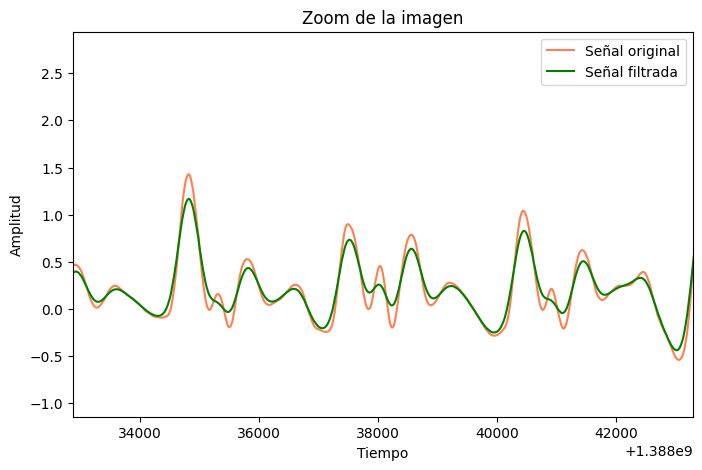

In [66]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Calcular el rango del 10% central de la muestra
total_points = len(array_dreta['UNIX_TIMESTAMP'])
start_index = int(total_points * 0.25)  # Inicio del 10% central
end_index = int(total_points * 0.35)    # Fin del 10% central

# Aplicar un filtro gaussiano a la señal ACC_X
filtered_signal = gaussian_filter(array_dreta['ACC_Y'], sigma=5)  # sigma es el parámetro que controla el ancho del filtro gaussiano

# Graficar la señal original y la señal filtrada
plt.figure(figsize=(8, 5))
plt.plot(array_dreta['UNIX_TIMESTAMP'], array_dreta['ACC_Y'], label='Señal original', color='coral')
plt.plot(array_dreta['UNIX_TIMESTAMP'], filtered_signal, label='Señal filtrada', color='green')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Zoom de la imagen')
plt.legend()
plt.grid(False)  # Quitar la cuadrícula del fondo

# Limitar el eje x al 10% central de la muestra
plt.xlim(array_dreta['UNIX_TIMESTAMP'][start_index], array_dreta['UNIX_TIMESTAMP'][end_index])

plt.show()


In [67]:
#realizamos el filtrado gausiano y la normalización

In [68]:
#derecha
#para eje x
# Eliminar la tendencia de la señal

array_dreta['ACC_X'] = gaussian_filter(array_dreta['ACC_X'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_dreta['ACC_X'] = (array_dreta['ACC_X'] - np.min(array_dreta['ACC_X'])) / (np.max(array_dreta['ACC_X']) - np.min(array_dreta['ACC_X']))

#para eje y

array_dreta['ACC_Y'] = gaussian_filter(array_dreta['ACC_Y'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_dreta['ACC_Y'] = (array_dreta['ACC_Y'] - np.min(array_dreta['ACC_Y'])) / (np.max(array_dreta['ACC_Y']) - np.min(array_dreta['ACC_Y']))

#para eje z

array_dreta['ACC_Z'] = gaussian_filter(array_dreta['ACC_Z'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_dreta['ACC_Z'] = (array_dreta['ACC_Z'] - np.min(array_dreta['ACC_Z'])) / (np.max(array_dreta['ACC_Z']) - np.min(array_dreta['ACC_Z']))


In [69]:

#smash
#para eje x
# Eliminar la tendencia de la señal

array_smash['ACC_X'] = gaussian_filter(array_smash['ACC_X'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_smash['ACC_X'] = (array_smash['ACC_X'] - np.min(array_smash['ACC_X'])) / (np.max(array_smash['ACC_X']) - np.min(array_smash['ACC_X']))

#para eje y

array_smash['ACC_Y'] = gaussian_filter(array_smash['ACC_Y'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_smash['ACC_Y'] = (array_smash['ACC_Y'] - np.min(array_smash['ACC_Y'])) / (np.max(array_smash['ACC_Y']) - np.min(array_smash['ACC_Y']))

#para eje z

array_smash['ACC_Z'] = gaussian_filter(array_smash['ACC_Z'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_smash['ACC_Z'] = (array_smash['ACC_Z'] - np.min(array_smash['ACC_Z'])) / (np.max(array_smash['ACC_Z']) - np.min(array_smash['ACC_Z']))


In [70]:
#servicio
#para eje x
# Eliminar la tendencia de la señal

array_serve['ACC_X'] = gaussian_filter(array_serve['ACC_X'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_serve['ACC_X'] = (array_serve['ACC_X'] - np.min(array_serve['ACC_X'])) / (np.max(array_serve['ACC_X']) - np.min(array_serve['ACC_X']))

#para eje y

array_serve['ACC_Y'] = gaussian_filter(array_serve['ACC_Y'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_serve['ACC_Y'] = (array_serve['ACC_Y'] - np.min(array_serve['ACC_Y'])) / (np.max(array_serve['ACC_Y']) - np.min(array_serve['ACC_Y']))

#para eje z

array_serve['ACC_Z'] = gaussian_filter(array_serve['ACC_Z'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_serve['ACC_Z'] = (array_serve['ACC_Z'] - np.min(array_serve['ACC_Z'])) / (np.max(array_serve['ACC_Z']) - np.min(array_serve['ACC_Z']))


In [71]:
#reves
#para eje x
# Eliminar la tendencia de la señal

array_reves['ACC_X'] = gaussian_filter(array_reves['ACC_X'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_reves['ACC_X'] = (array_reves['ACC_X'] - np.min(array_reves['ACC_X'])) / (np.max(array_reves['ACC_X']) - np.min(array_reves['ACC_X']))

#para eje y

array_reves['ACC_Y'] = gaussian_filter(array_reves['ACC_Y'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_reves['ACC_Y'] = (array_reves['ACC_Y'] - np.min(array_reves['ACC_Y'])) / (np.max(array_reves['ACC_Y']) - np.min(array_reves['ACC_Y']))

#para eje z

array_reves['ACC_Z'] = gaussian_filter(array_reves['ACC_Z'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_reves['ACC_Z'] = (array_reves['ACC_Z'] - np.min(array_reves['ACC_Z'])) / (np.max(array_reves['ACC_Z']) - np.min(array_reves['ACC_Z']))


In [72]:
#volea derecha
#para eje x
# Eliminar la tendencia de la señal

array_vd['ACC_X'] = gaussian_filter(array_vd['ACC_X'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_vd['ACC_X'] = (array_vd['ACC_X'] - np.min(array_vd['ACC_X'])) / (np.max(array_vd['ACC_X']) - np.min(array_vd['ACC_X']))

#para eje y

array_vd['ACC_Y'] = gaussian_filter(array_vd['ACC_Y'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_vd['ACC_Y'] = (array_vd['ACC_Y'] - np.min(array_vd['ACC_Y'])) / (np.max(array_vd['ACC_Y']) - np.min(array_vd['ACC_Y']))

#para eje z

array_vd['ACC_Z'] = gaussian_filter(array_vd['ACC_Z'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_vd['ACC_Z'] = (array_vd['ACC_Z'] - np.min(array_vd['ACC_Z'])) / (np.max(array_vd['ACC_Z']) - np.min(array_vd['ACC_Z']))


In [73]:
#volea reves
#para eje x
# Eliminar la tendencia de la señal

array_vr['ACC_X'] = gaussian_filter(array_vr['ACC_X'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_vr['ACC_X'] = (array_vr['ACC_X'] - np.min(array_vr['ACC_X'])) / (np.max(array_vr['ACC_X']) - np.min(array_vr['ACC_X']))

#para eje y

array_vr['ACC_Y'] = gaussian_filter(array_vr['ACC_Y'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_vr['ACC_Y'] = (array_vr['ACC_Y'] - np.min(array_vr['ACC_Y'])) / (np.max(array_vr['ACC_Y']) - np.min(array_vr['ACC_Y']))

#para eje z

array_vr['ACC_Z'] = gaussian_filter(array_vr['ACC_Z'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_vr['ACC_Z'] = (array_vr['ACC_Z'] - np.min(array_vr['ACC_Z'])) / (np.max(array_vr['ACC_Z']) - np.min(array_vr['ACC_Z']))


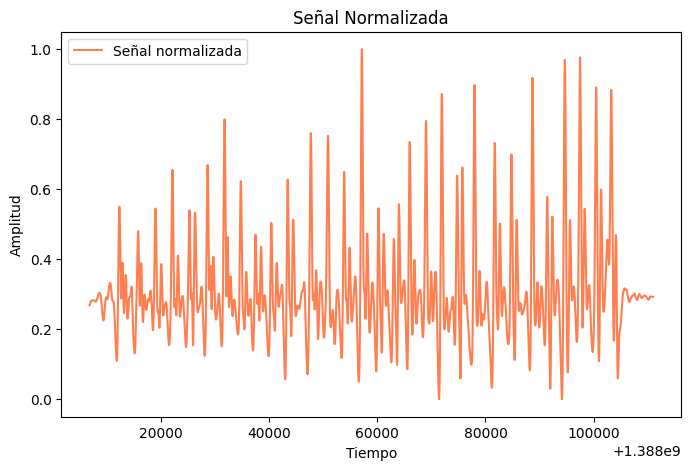

In [74]:

# Graficar la señal original y la señal filtrada
plt.figure(figsize=(8, 5))
plt.plot(array_dreta['UNIX_TIMESTAMP'], array_dreta['ACC_Y'], label='Señal normalizada', color='coral')

plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal Normalizada')
plt.legend()
plt.grid(False)  # Quitar la cuadrícula del fondo
plt.show()


# DETECCION DE GOLPES

# DERECHA DE ACC

## Miramos para el eje x el y y el z, cuantos picos detecta

0.13911978770395836
0.5728535733483839
[ 605  806  962 1128 1284 1384 1564 1707 1857 2020 2175 2325 2531 2682
 2822 2922 3070 3213 3356 3512 3698 3895 4041 4176 4381 4514 4621 4757]


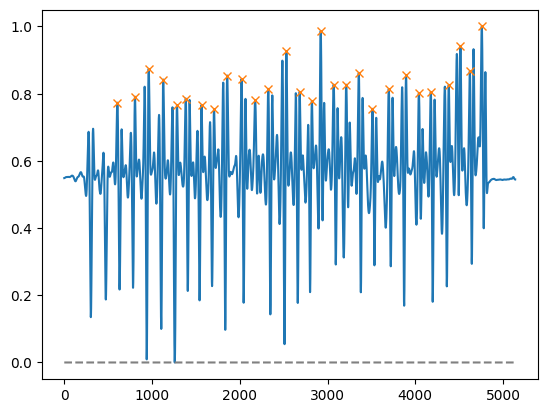

distancia media 153.77777777777777
numero total de golpes 28


In [75]:
#para x
peak_height = np.std(array_dreta['ACC_X'])
mean_signal = np.mean(array_dreta['ACC_X'])
print(peak_height)
print(mean_signal)

peaks, _ = find_peaks(array_dreta['ACC_X'], height=mean_signal + peak_height, distance = 100)
print(peaks)
plt.plot(array_dreta['ACC_X'])
plt.plot(peaks, array_dreta['ACC_X'][peaks], "x")
plt.plot(np.zeros_like(array_dreta['ACC_X']), "--", color="gray")
plt.show()
# Calcular la distancia entre los picos
distances_between_peaks = np.diff(peaks)

# Calcular la media de la distancia entre picos
mean_distance_between_peaks = np.mean(distances_between_peaks)
print('distancia media' ,mean_distance_between_peaks)
num_peaks = len(peaks)
print('numero total de golpes', num_peaks)

Altura del pico: 0.14783112226257367
Media de la señal: 0.31066280073085073


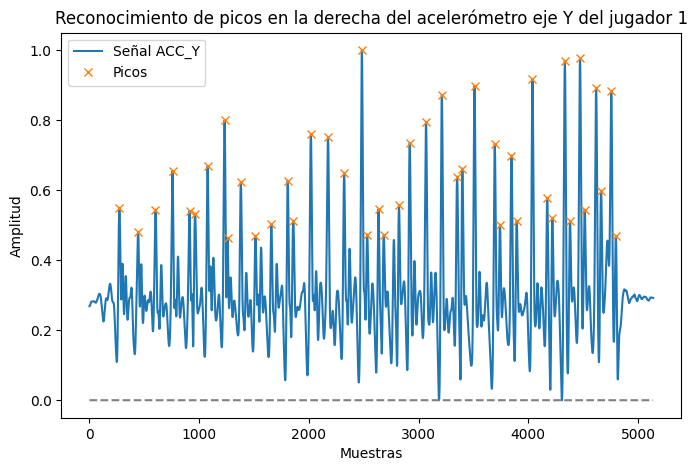

Distancia media entre picos: 107.76190476190476
Número total de picos: 43


In [76]:

# Calcular la altura del pico y la media de la señal
peak_height = np.std(array_dreta['ACC_Y'])
mean_signal = np.mean(array_dreta['ACC_Y'])
print("Altura del pico:", peak_height)
print("Media de la señal:", mean_signal)

# Encontrar picos en la señal ACC_Y
peaks, _ = find_peaks(array_dreta['ACC_Y'], height=mean_signal + peak_height, distance=2)

# Graficar la señal y los picos
plt.figure(figsize=(8, 5))
plt.plot(array_dreta['ACC_Y'], label='Señal ACC_Y')
plt.plot(peaks, np.array(array_dreta['ACC_Y'])[peaks], "x", label='Picos')
plt.plot(np.zeros_like(array_dreta['ACC_Y']), "--", color="gray")
plt.title('Reconocimiento de picos en la derecha del acelerómetro eje Y del jugador 1')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

# Calcular la distancia entre los picos
distances_between_peaks = np.diff(peaks)

# Calcular la media de la distancia entre picos
mean_distance_between_peaks = np.mean(distances_between_peaks)
print('Distancia media entre picos:', mean_distance_between_peaks)

# Número total de picos
num_peaks = len(peaks)
print('Número total de picos:', num_peaks)

0.1192853248380441
0.6516759828318415


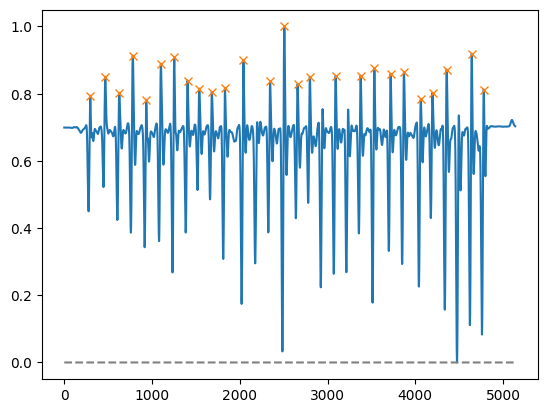

distancia media 179.36
numero total de golpes 26
entro aqui


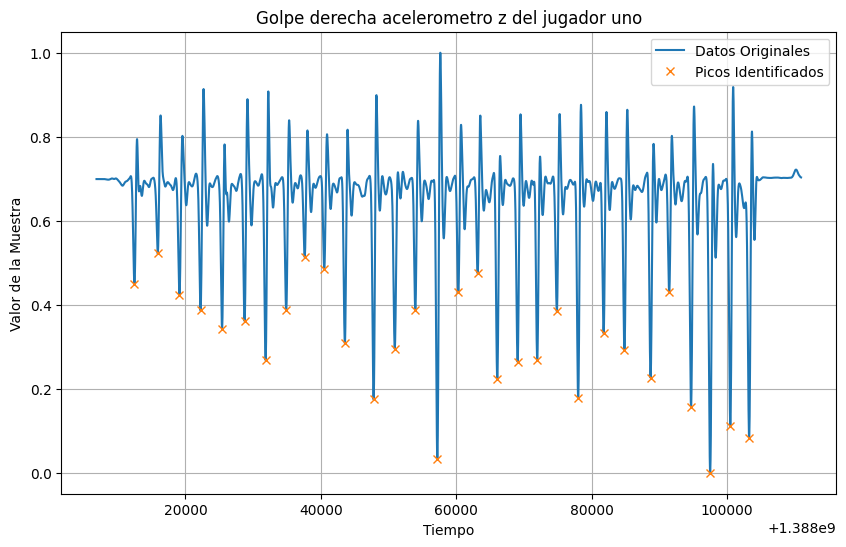

0.1192853248380441
-0.6516759828318415
distancia media 154.55172413793105
numero total de golpes 30


In [77]:
#para el eje z

peak_height = np.std(array_dreta['ACC_Z'])
mean_signal = np.mean(array_dreta['ACC_Z'])
print(peak_height)
print(mean_signal)

peaks, _ = find_peaks(array_dreta['ACC_Z'], height=mean_signal + peak_height, distance = 100)

peaks_tiempo = array_dreta['UNIX_TIMESTAMP'][peaks]
plt.plot(array_dreta['ACC_Z'])
plt.plot(peaks, array_dreta['ACC_Z'][peaks], "x")
plt.plot(np.zeros_like(array_dreta['ACC_Z']), "--", color="gray")
plt.show()
# Calcular la distancia entre los picos
distances_between_peaks = np.diff(peaks)

# Calcular la media de la distancia entre picos
mean_distance_between_peaks = np.mean(distances_between_peaks)
print('distancia media' ,mean_distance_between_peaks)
num_peaks = len(peaks)
print('numero total de golpes', num_peaks)

if (mean_distance_between_peaks <=  100) and (mean_distance_between_peaks >=  150):
    plt.plot(array_dreta['ACC_Z'])
    plt.plot(peaks, array_dreta['ACC_Z'][peaks], "x")
    plt.plot(np.zeros_like(array_dreta['ACC_Z']), "--", color="gray")
    plt.show()
else:
    print('entro aqui')
    # Invertir el signo de los datos
    array1_z1_invertido = -array_dreta['ACC_Z']

    # Calcular la desviación estándar y la media del array invertido
    peak_height = np.std(array1_z1_invertido)
    mean_signal = np.mean(array1_z1_invertido)

    # Encontrar picos negativos
    peaks, _ = find_peaks(array1_z1_invertido, height=mean_signal + peak_height, distance=100)


    plt.figure(figsize=(10, 6))
    plt.plot(array_dreta['UNIX_TIMESTAMP'], array_dreta['ACC_Z'], label='Datos Originales')
    plt.plot(array_dreta['UNIX_TIMESTAMP'][peaks], array_dreta['ACC_Z'][peaks], 'x', label='Picos Identificados')
    plt.xlabel('Tiempo')
    plt.ylabel('Valor de la Muestra')
    plt.title('Golpe derecha acelerometro z del jugador uno')
    plt.legend()
    plt.grid(True)
    plt.show()
    print(peak_height)
    print(mean_signal)

    distances_between_peaks = np.diff(peaks)
    mean_distance_between_peaks = np.mean(distances_between_peaks)
    print('distancia media' ,mean_distance_between_peaks)
    num_peaks = len(peaks)
    print('numero total de golpes', num_peaks)





In [78]:
#creamos una funcion que calcule la media de la muestra 
#y si es menor que 0.5 busque puntos positivos y si es mayor que 0.5 busque puntos negativos

Media de la señal: 0.5728535733483839
Altura del pico: 0.13911978770395836
Distancia media entre picos: 172.19230769230768
Número total de golpes: 27


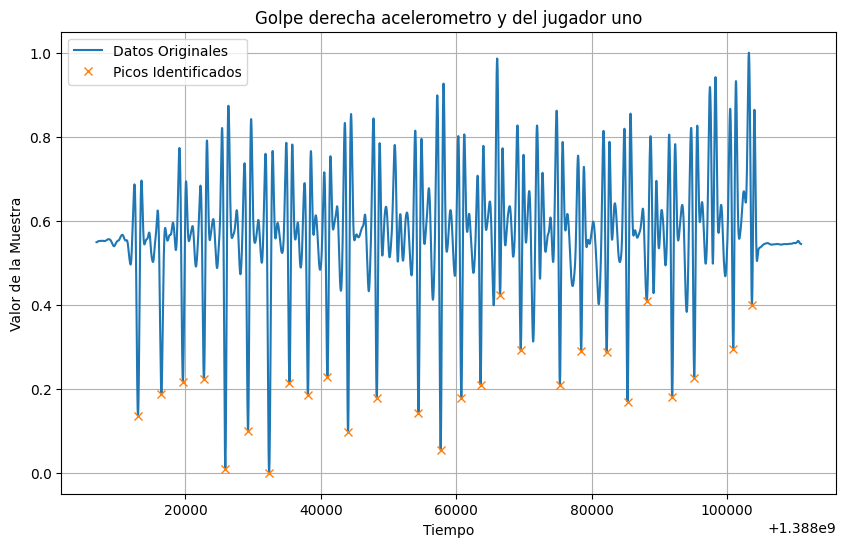

array([ 303,  473,  630,  784,  940, 1105, 1259, 1407, 1542, 1684, 1834,
       2044, 2348, 2510, 2661, 2801, 2943, 3094, 3379, 3535, 3720, 3873,
       4013, 4198, 4359, 4644, 4780], dtype=int64)

In [79]:


def analyze_signal(array, eje):
    # Calcular la media de la señal ACC_Z
    mean_signal = np.mean(array[eje])
    print(f'Media de la señal: {mean_signal}')
    
    # Determinar si buscar picos positivos o negativos
    if mean_signal < 0.5:
        signal_to_analyze = array[eje]
        direction = "positive"
    else:
        signal_to_analyze = -array[eje]
        direction = "negative"
    
    # Calcular la desviación estándar
    peak_height = np.std(array[eje])
    
    # Ajustar el umbral de altura para los picos negativos
    height_threshold = mean_signal + peak_height if direction == "positive" else -mean_signal + peak_height
    
    # Encontrar picos en la señal
    peaks, _ = find_peaks(signal_to_analyze, height=height_threshold, distance=100)
    
    # Calcular la distancia entre los picos
    distances_between_peaks = np.diff(peaks)
    
    # Calcular la media de la distancia entre picos
    mean_distance_between_peaks = np.mean(distances_between_peaks)
    
    # Número total de picos
    num_peaks = len(peaks)
    
    print(f'Altura del pico: {peak_height}')
    print(f'Distancia media entre picos: {mean_distance_between_peaks}')
    print(f'Número total de golpes: {num_peaks}')
    
    # Graficar la señal y los picos
    plt.figure(figsize=(10, 6))
    plt.plot(array['UNIX_TIMESTAMP'], array[eje], label='Datos Originales')
    plt.plot(array['UNIX_TIMESTAMP'][peaks], array[eje][peaks], 'x', label='Picos Identificados')
    plt.xlabel('Tiempo')
    plt.ylabel('Valor de la Muestra')
    plt.title('Golpe derecha acelerometro y del jugador uno')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return peaks



# Llamar a la función con los datos
analyze_signal(array_dreta, 'ACC_X')


Media de la señal: 0.31066280073085073
Altura del pico: 0.14783112226257367
Distancia media entre picos: 160.10714285714286
Número total de golpes: 29


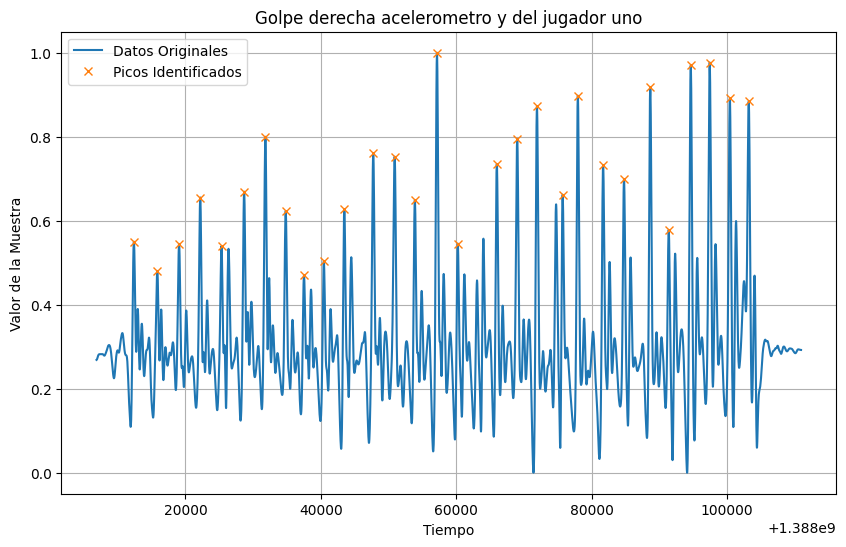

In [80]:
# Llamar a la función con los datos
peaks = analyze_signal(array_dreta, 'ACC_Y')

Media de la señal: 0.6516759828318415
Altura del pico: 0.1192853248380441
Distancia media entre picos: 154.55172413793105
Número total de golpes: 30


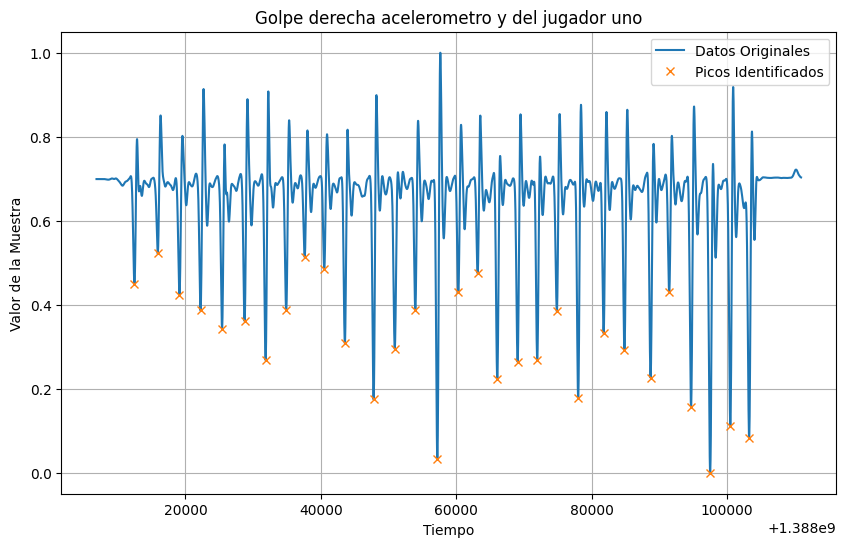

In [81]:
# Llamar a la función con los datos
peaks = analyze_signal(array_dreta, 'ACC_Z')

In [82]:
#Escogemos uno de los ejes para decidir la cantidad de golpe

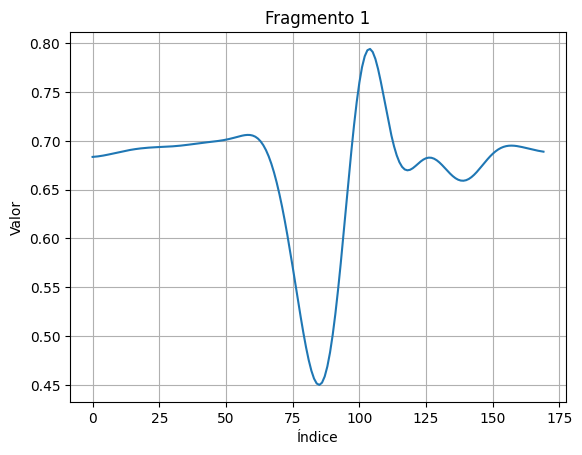

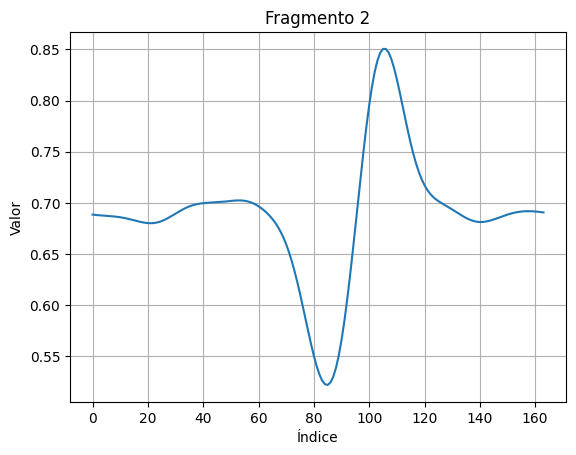

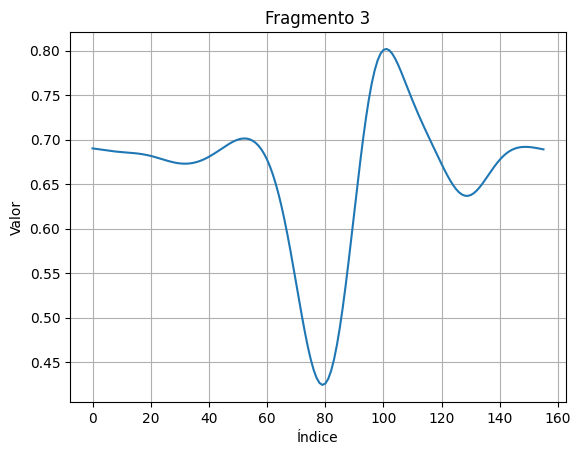

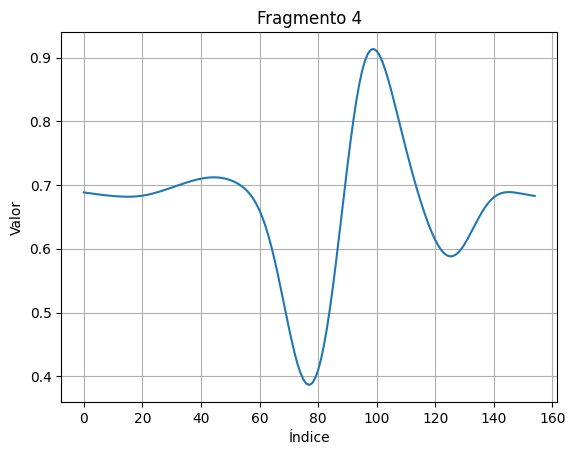

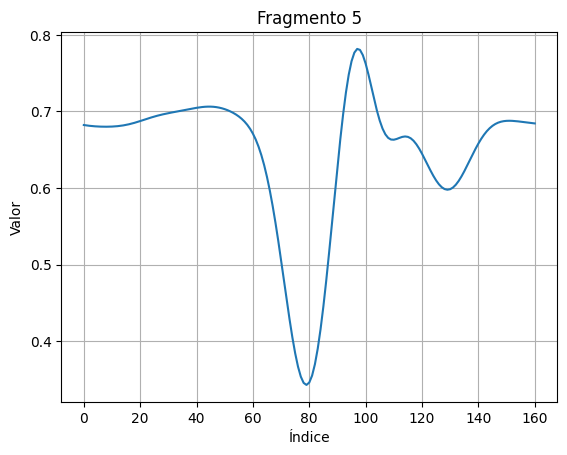

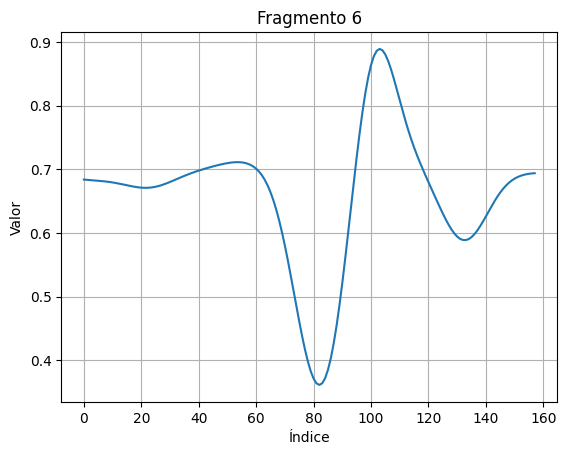

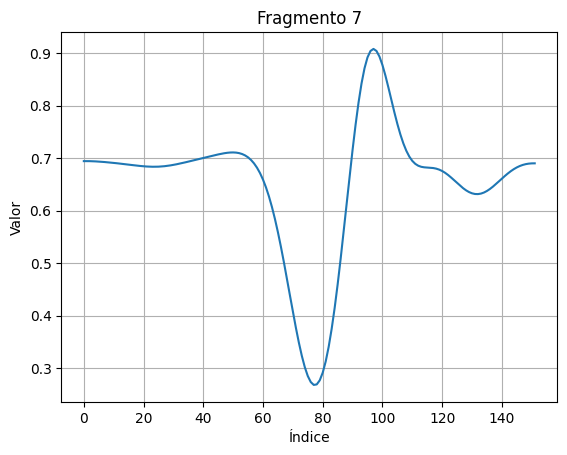

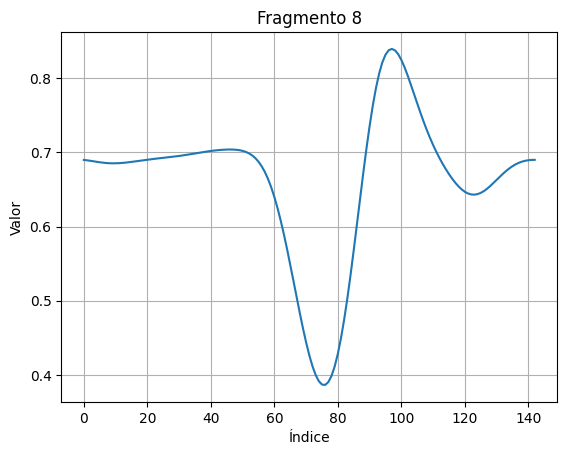

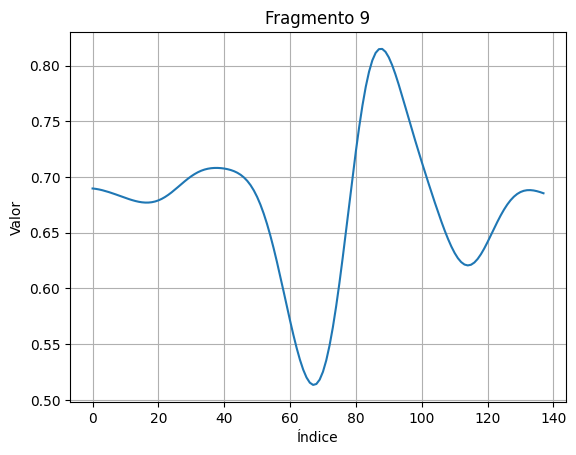

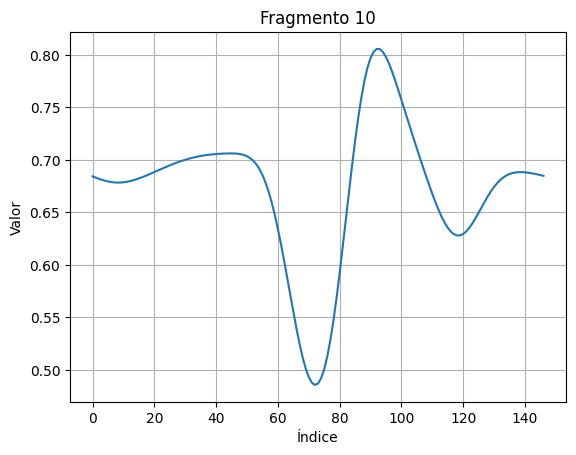

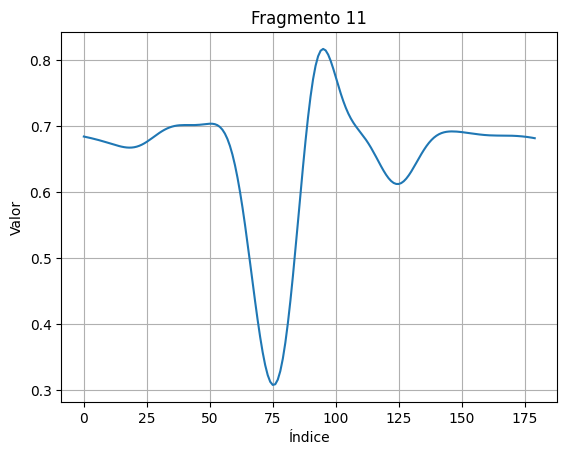

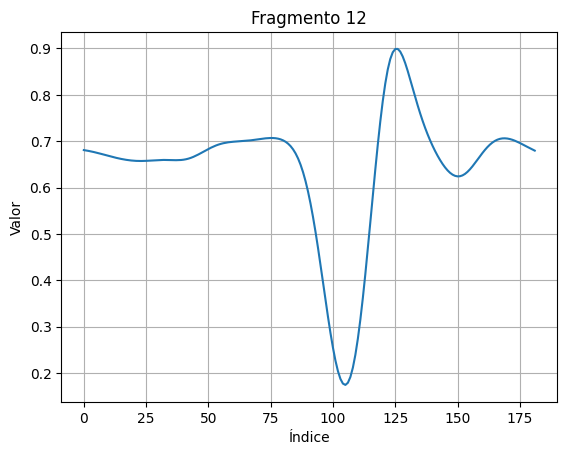

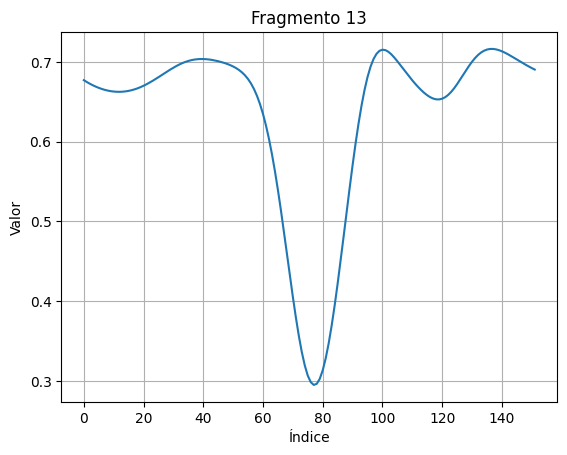

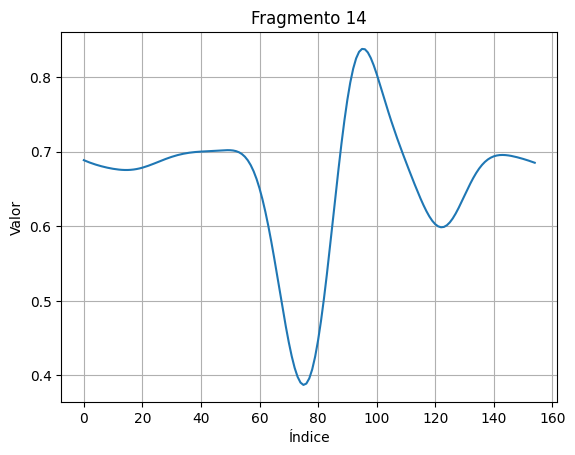

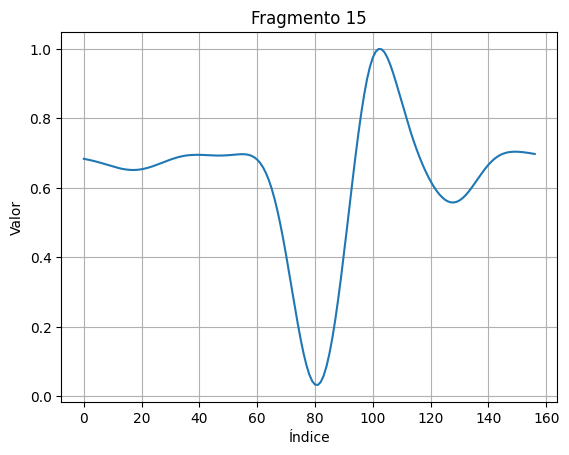

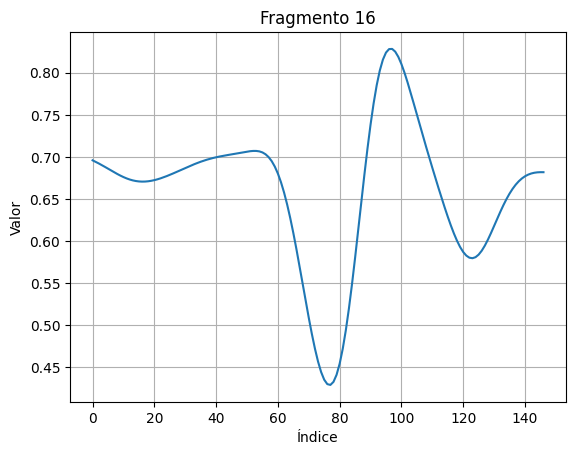

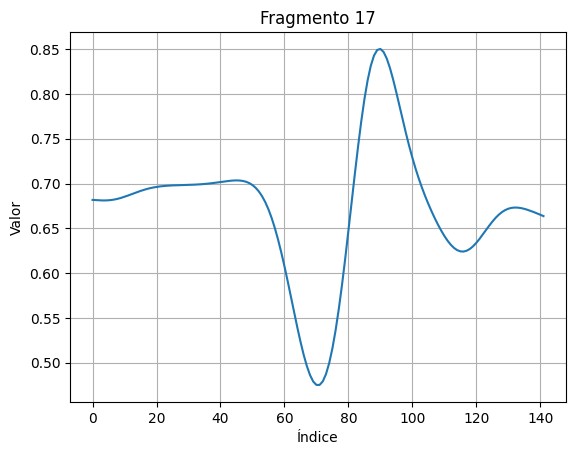

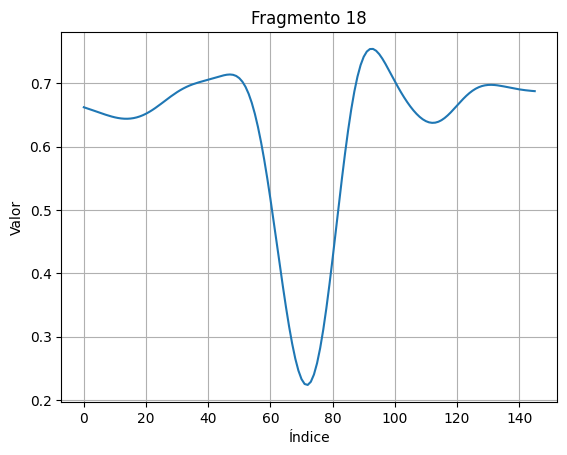

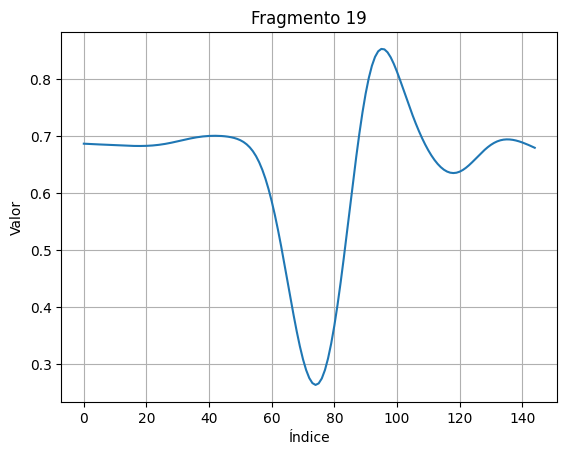

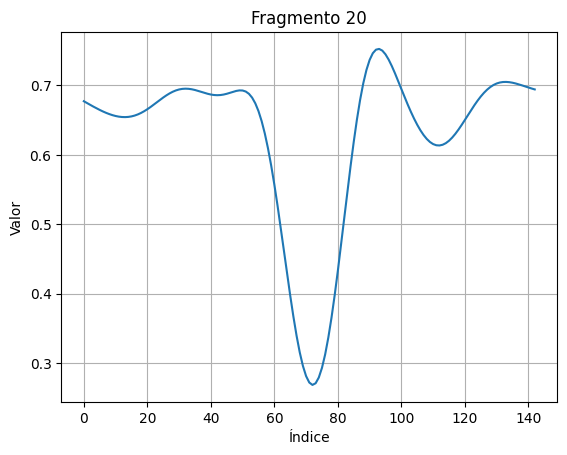

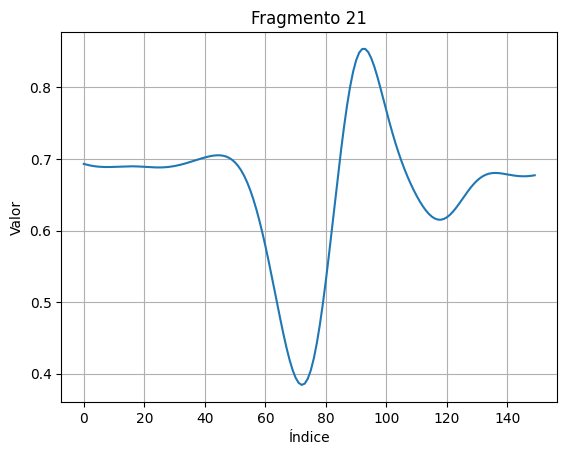

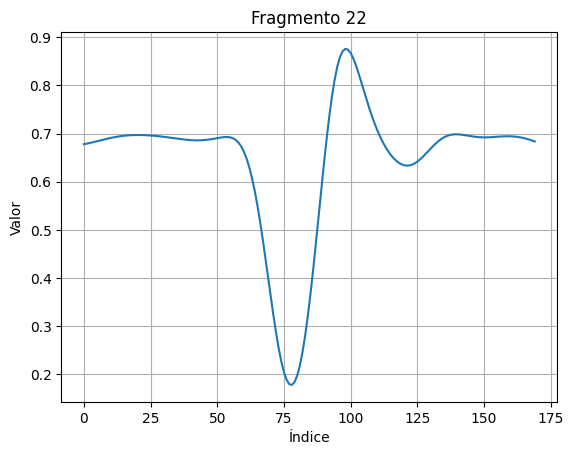

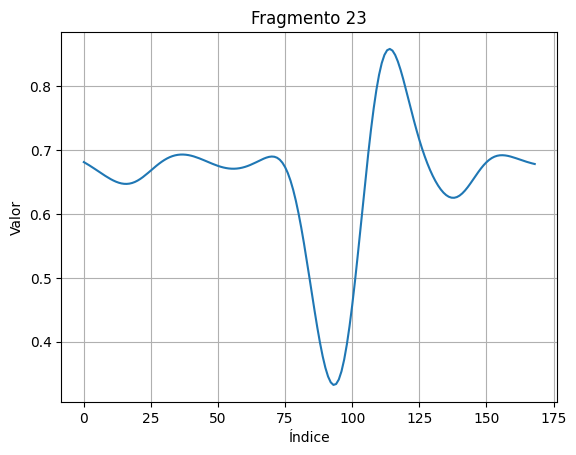

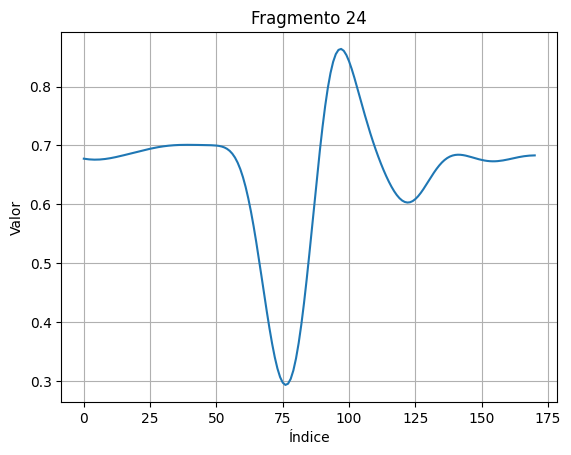

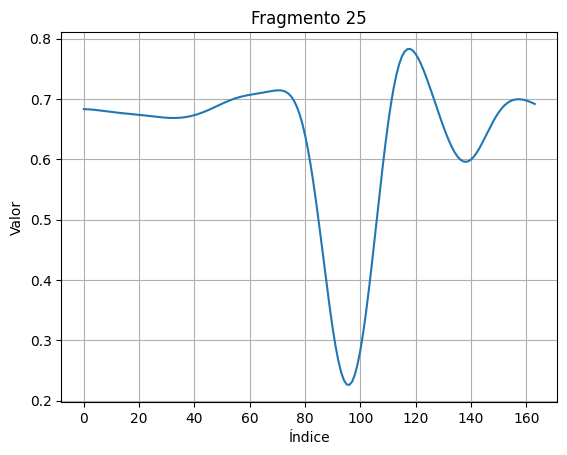

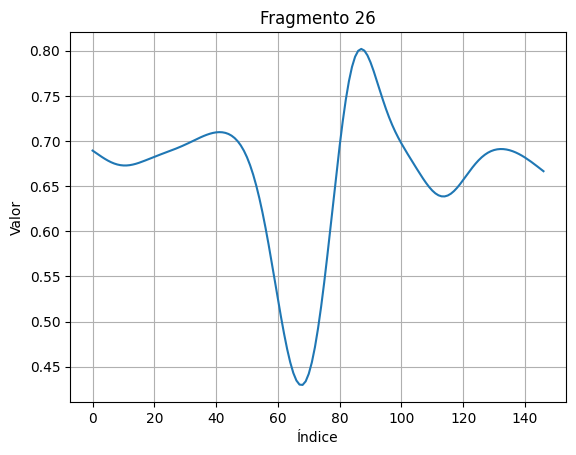

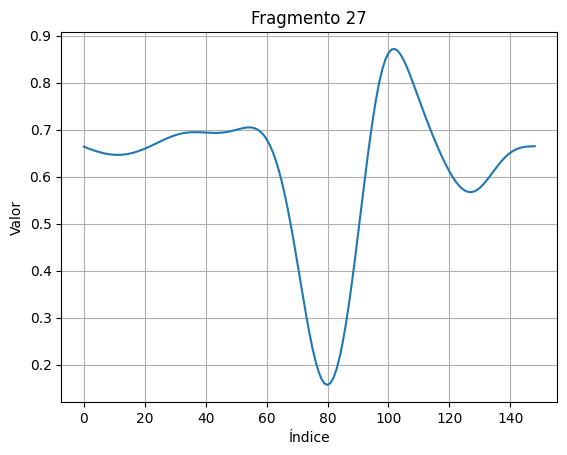

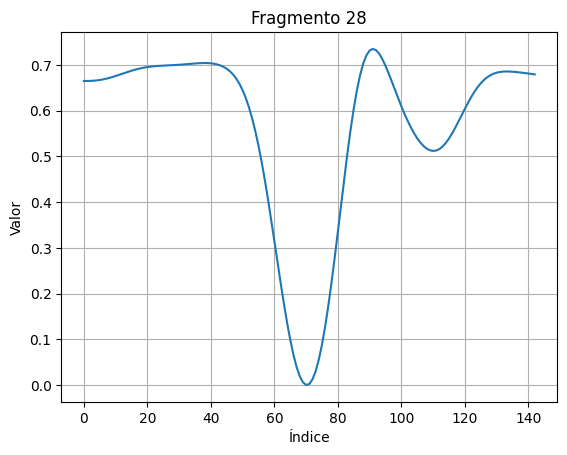

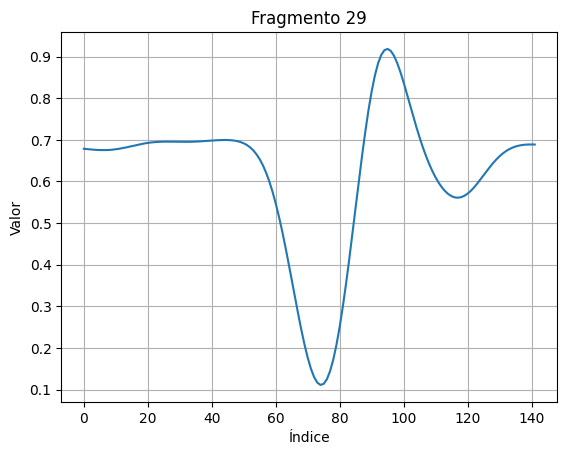

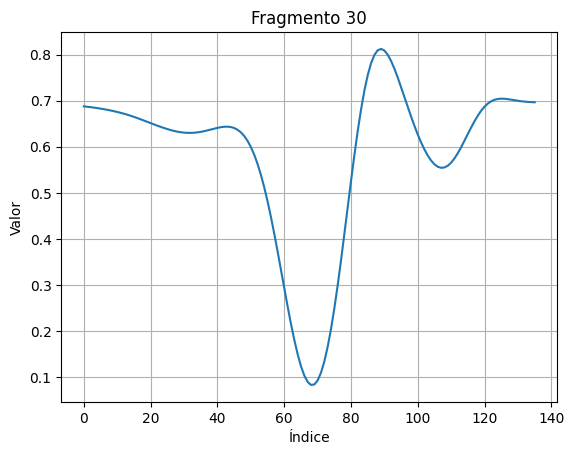

In [83]:
fragments = []

# Fragmentar la señal alrededor de cada pico y plotear cada fragmento
for i, peak_index in enumerate(peaks):
    print 
    if i == 0:
        start_index = peak_index - int(distances_between_peaks[i] / 2)
        end_index = peak_index + int(distances_between_peaks[i] / 2)
    elif i == len(peaks)-1:
        start_index = peak_index - int(distances_between_peaks[i-1] / 2)
        end_index = peak_index + int(distances_between_peaks[i-1] / 2)
    else:
        start_index = peaks[i-1] + int(distances_between_peaks[i-1] / 2)
        end_index = peak_index + int(distances_between_peaks[i] / 2)
    fragment = array_dreta[start_index:end_index]
    
    fragment_values = fragment['ACC_Z']
    
    # Plotear el fragmento
    plt.figure()
    plt.plot(fragment_values)
    plt.title(f"Fragmento {i+1}")
    plt.xlabel("Índice")
    plt.ylabel("Valor")
    plt.grid(True)
    plt.show()
    
    fragments.append(fragment)
    
    

    

In [84]:

# # Directorio donde se guardarán los archivos CSV
# directory = "C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/fragmentos"

# # Si el directorio no existe, créalo
# if not os.path.exists(directory):
#     os.makedirs(directory)

# # Itera sobre los fragmentos y guárdalos como archivos CSV
# for i, fragment in enumerate(fragments):
#     # Nombre del archivo CSV
#     filename = os.path.join(directory, f"derecha_J1_{i+1}.csv")
    
#     # Abre el archivo CSV en modo escritura
#     with open(filename, mode='w', newline='') as file:
#         writer = csv.writer(file)
        
#         # Escribe los datos del fragmento en el archivo CSV
#         for row in fragment:
#             writer.writerow(row)


# REVES DE ACC

In [85]:
#realizamos lo mismo para el reves 

Media de la señal: 0.5287517775754497
Altura del pico: 0.11002526287756015
Distancia media entre picos: 193.83333333333334
Número total de golpes: 25


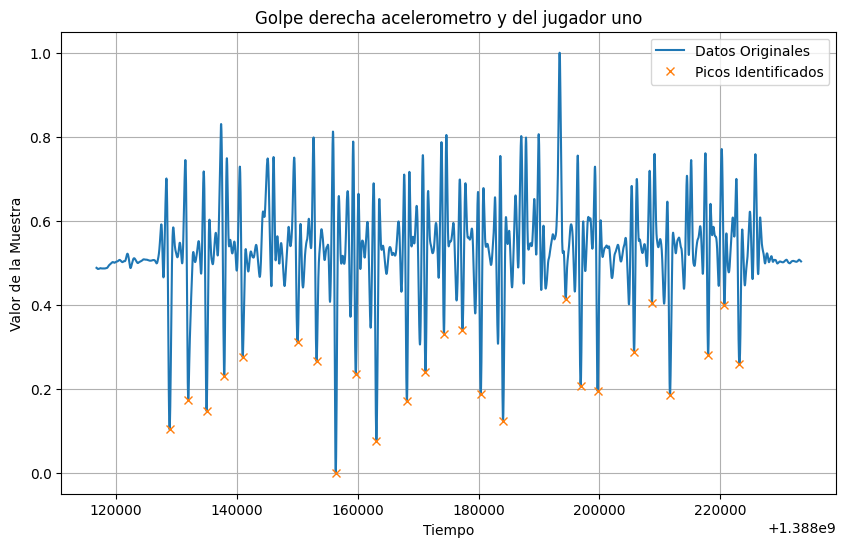

In [86]:
# Llamar a la función con los datos
peaks = analyze_signal(array_reves, 'ACC_X')

Media de la señal: 0.36329790886940916
Altura del pico: 0.1132920732722581
Distancia media entre picos: 165.68965517241378
Número total de golpes: 30


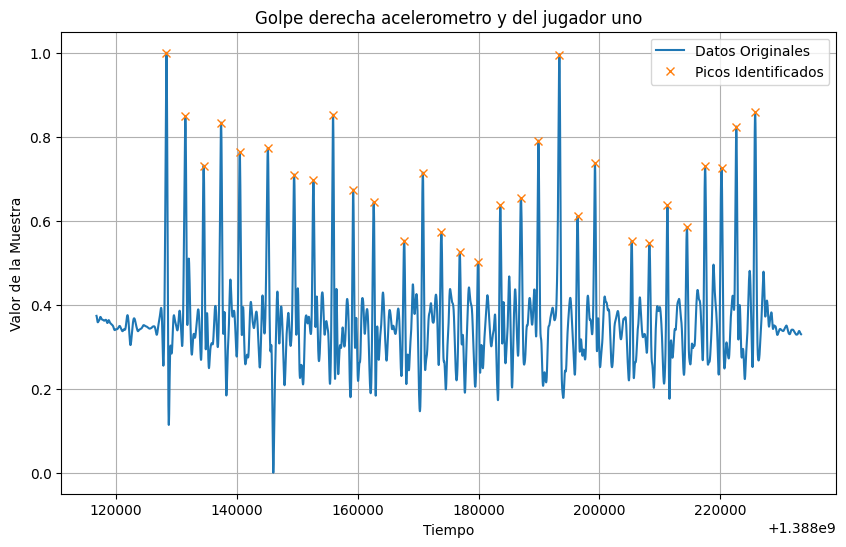

In [87]:
peaks = analyze_signal(array_reves, 'ACC_Y')

Media de la señal: 0.7042210340891658
Altura del pico: 0.09270289058106633
Distancia media entre picos: 171.71428571428572
Número total de golpes: 29


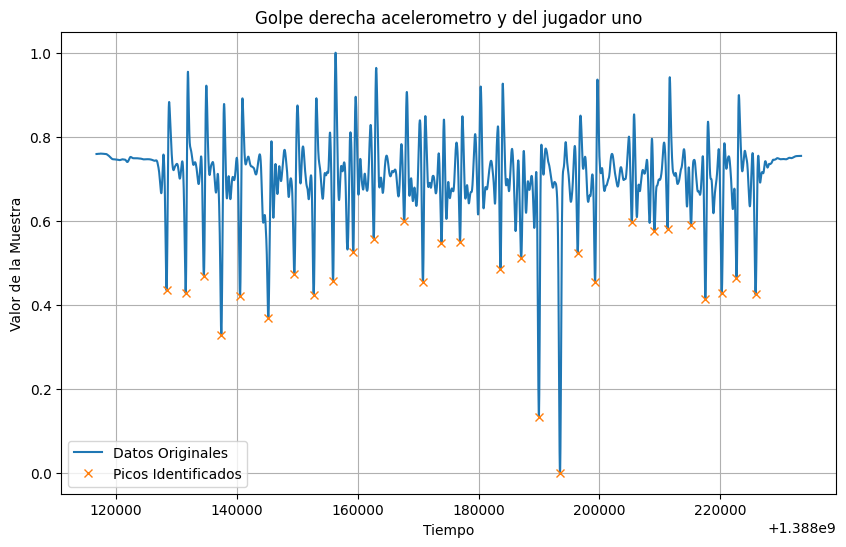

In [88]:
peaks = analyze_signal(array_reves, 'ACC_Z')

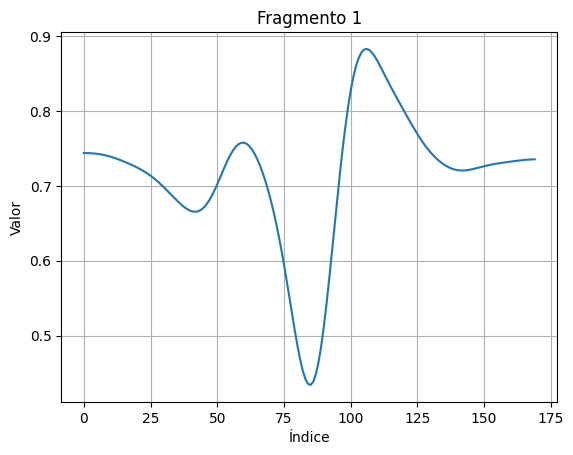

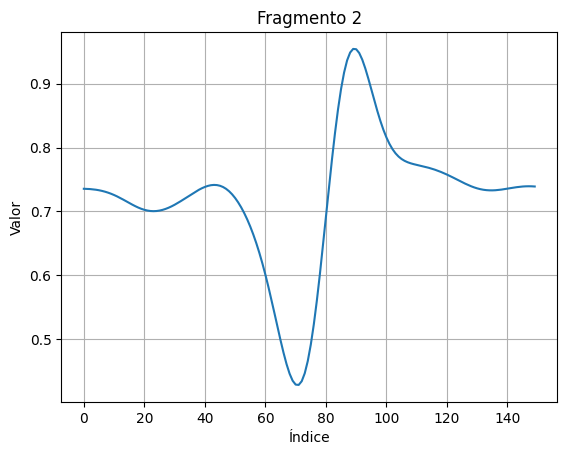

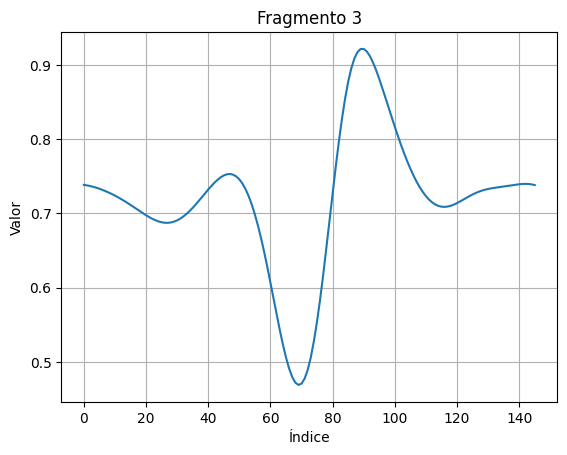

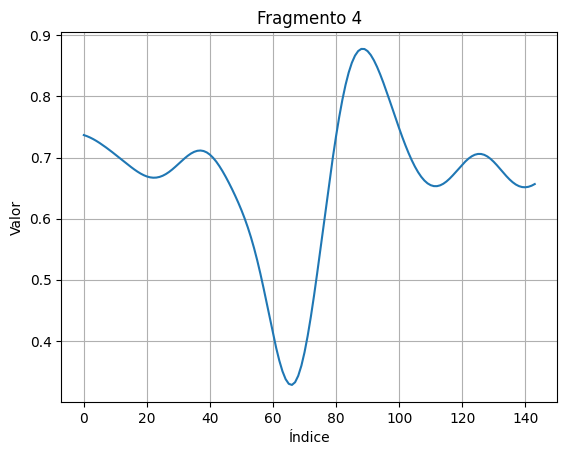

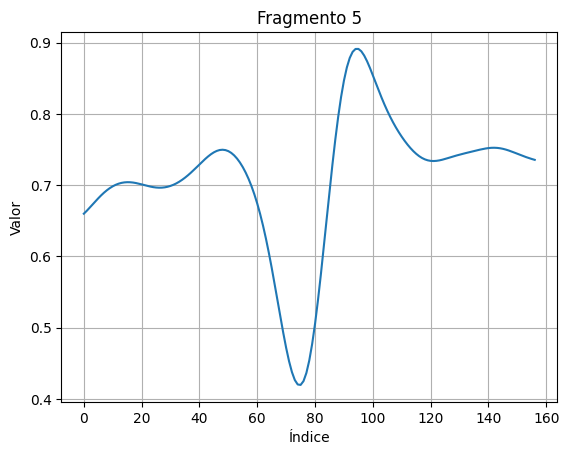

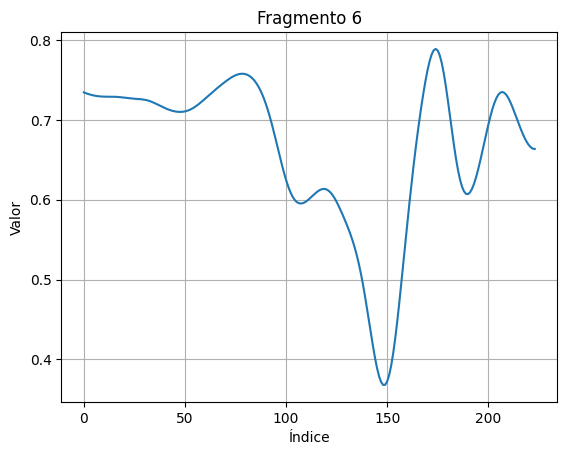

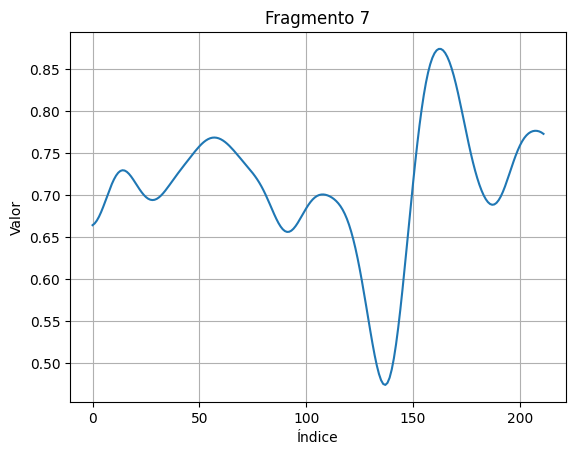

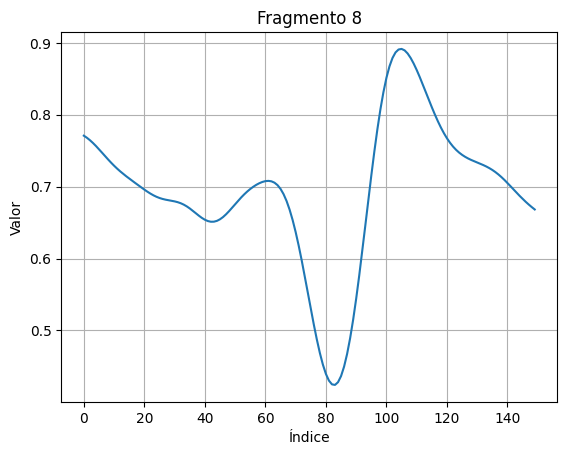

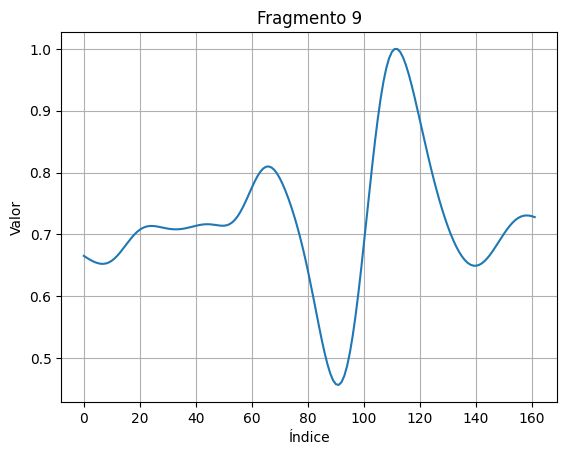

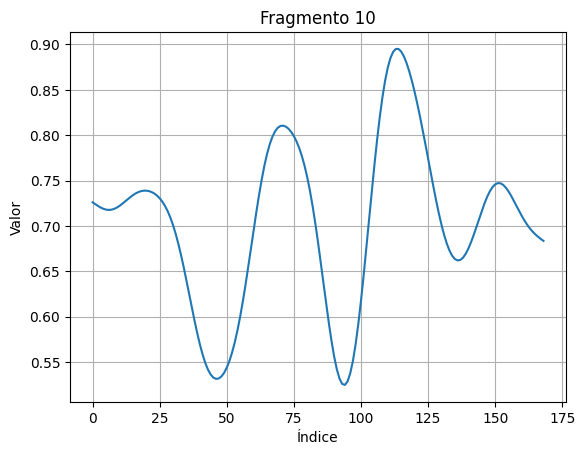

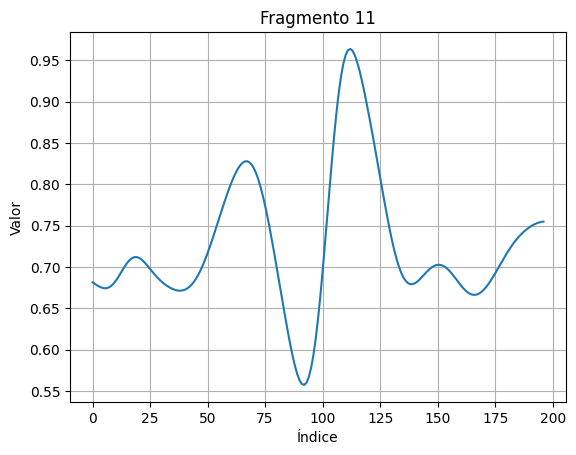

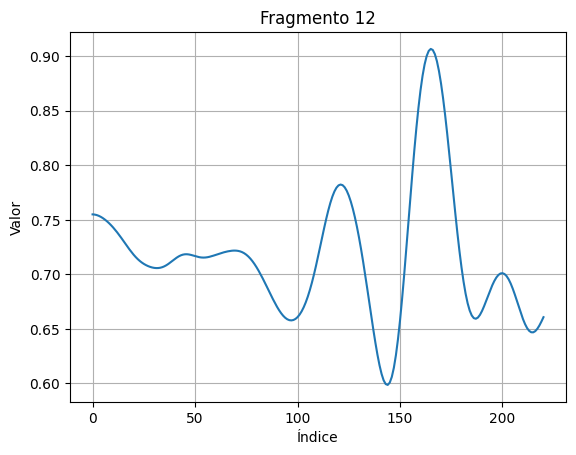

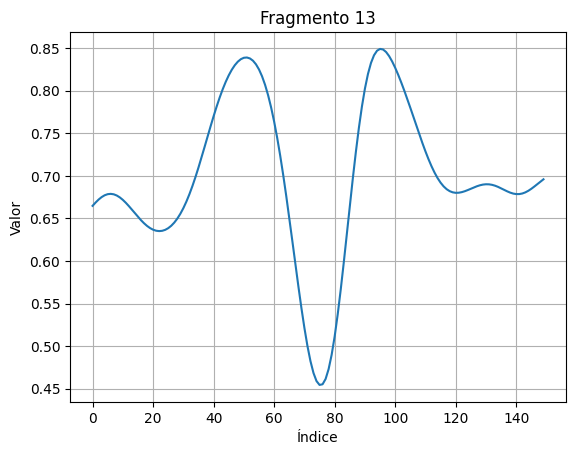

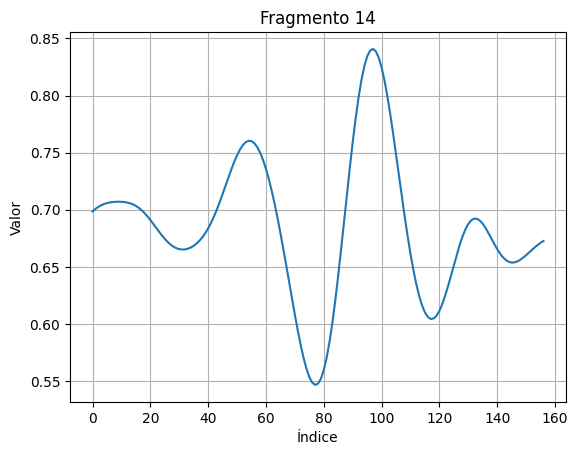

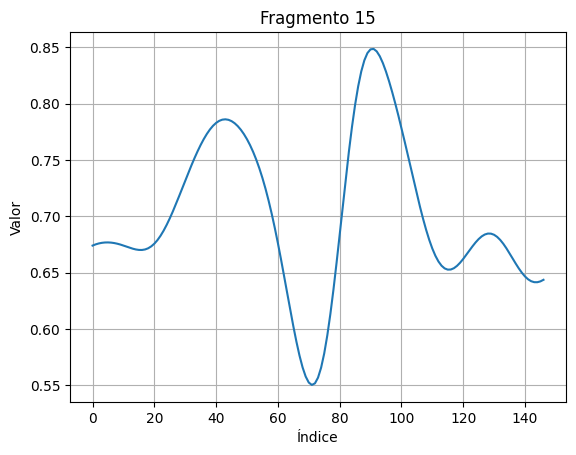

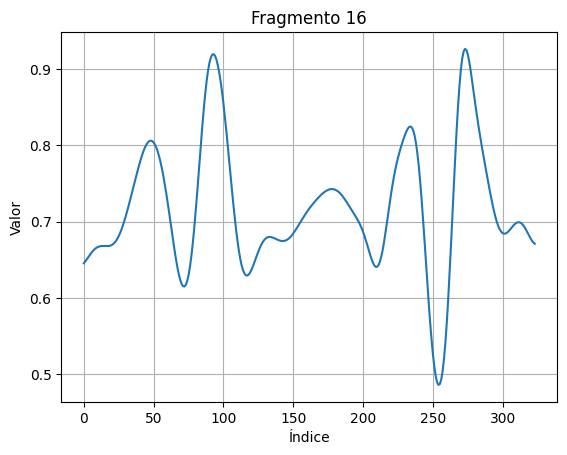

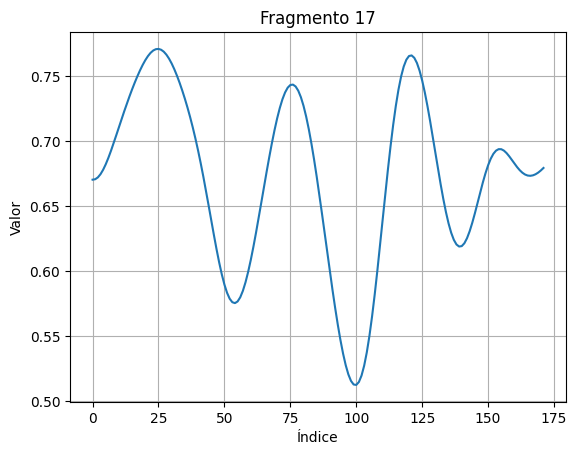

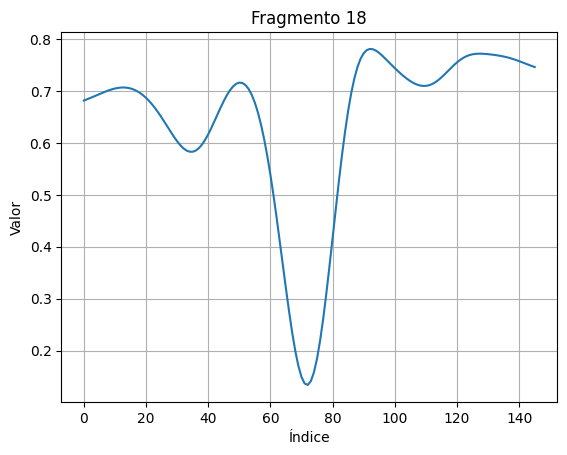

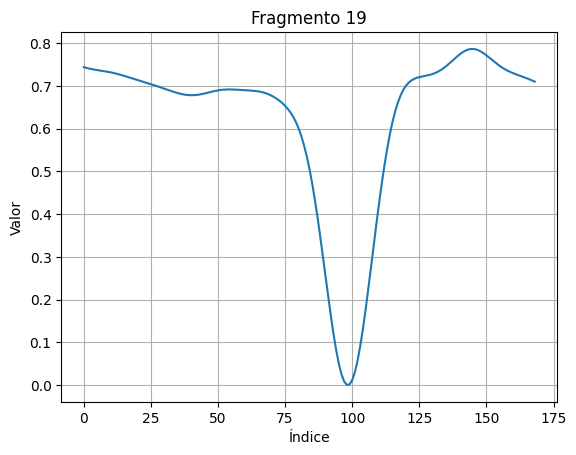

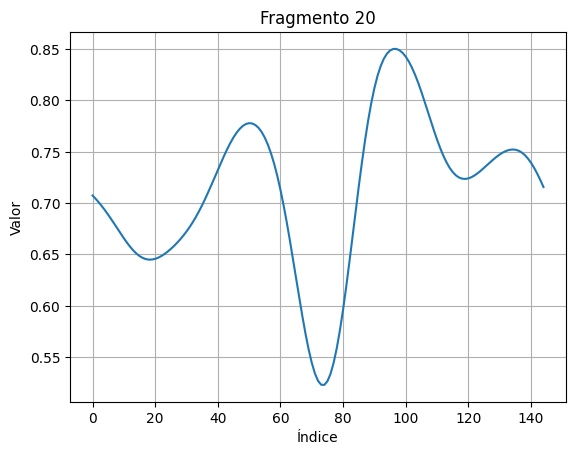

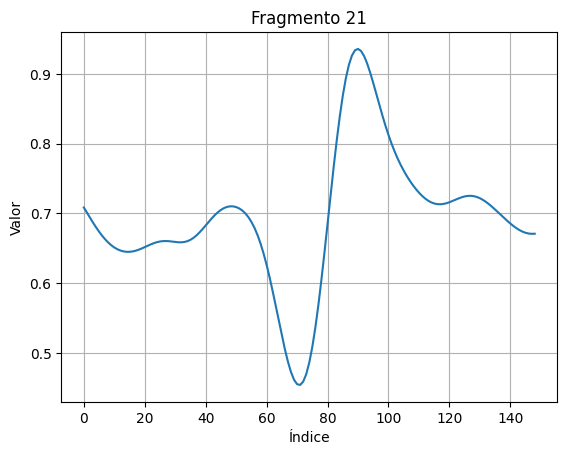

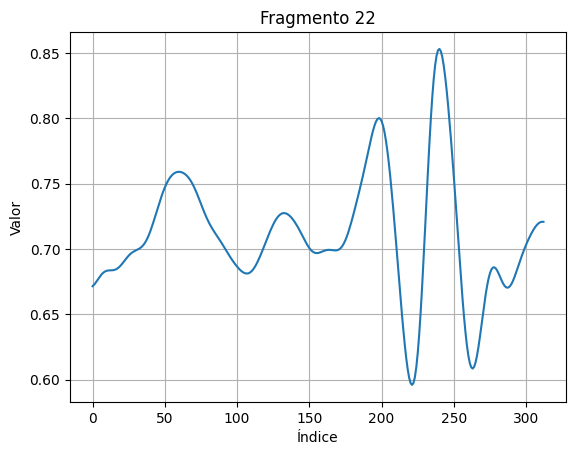

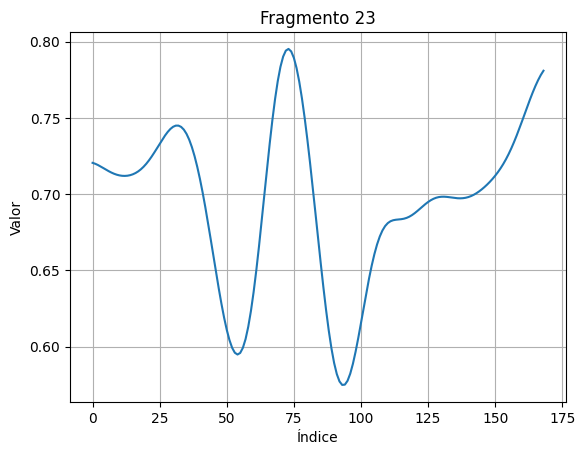

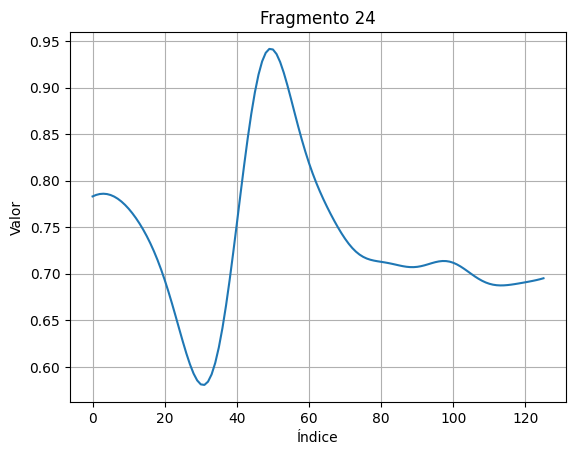

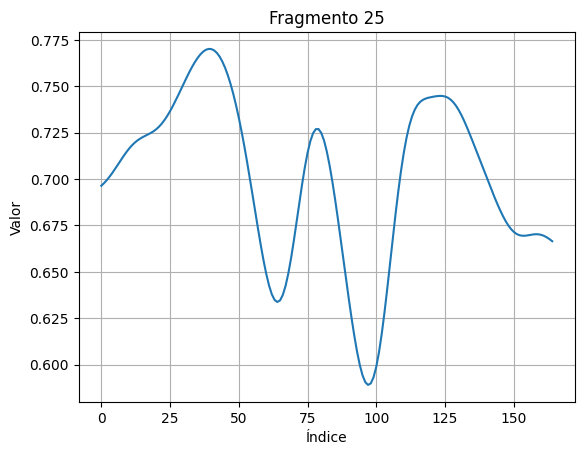

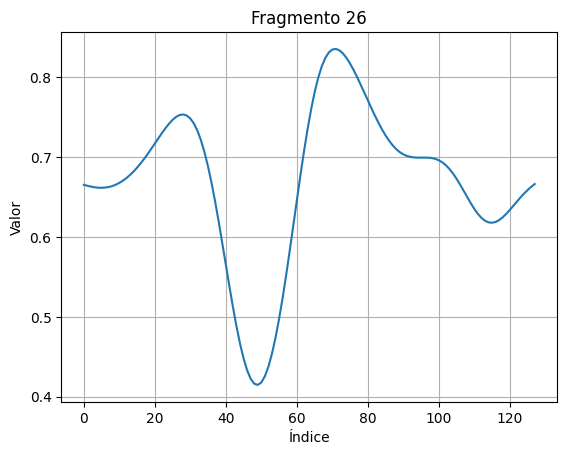

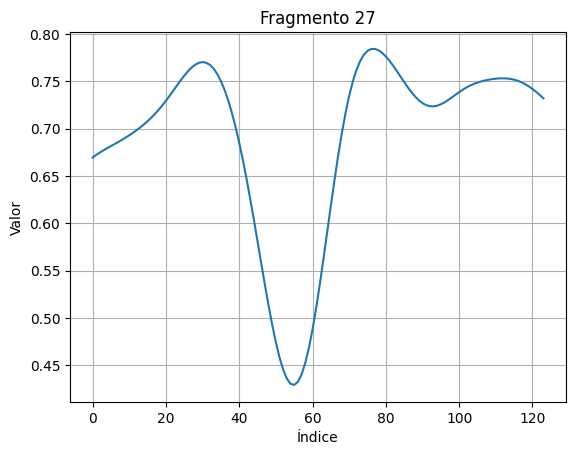

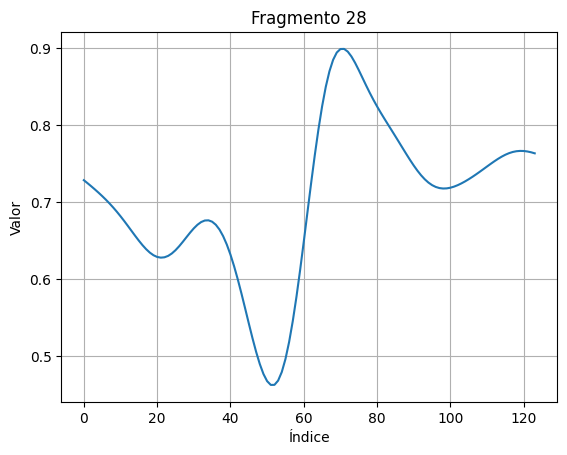

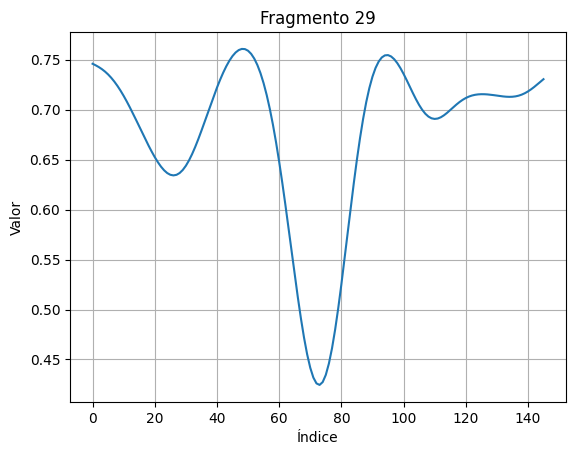

In [89]:
fragments = []

# Fragmentar la señal alrededor de cada pico y plotear cada fragmento
for i, peak_index in enumerate(peaks):
    print 
    if i == 0:
        start_index = peak_index - int(distances_between_peaks[i] / 2)
        end_index = peak_index + int(distances_between_peaks[i] / 2)
    elif i == len(peaks)-1:
        start_index = peak_index - int(distances_between_peaks[i-1] / 2)
        end_index = peak_index + int(distances_between_peaks[i-1] / 2)
    else:
        start_index = peaks[i-1] + int(distances_between_peaks[i-1] / 2)
        end_index = peak_index + int(distances_between_peaks[i] / 2)
    fragment = array_reves[start_index:end_index]
    
    # Obtener la segunda columna de cada fragmento
    fragment_values = fragment['ACC_Z']
    
    # Plotear el fragmento
    plt.figure()
    plt.plot(fragment_values)
    plt.title(f"Fragmento {i+1}")
    plt.xlabel("Índice")
    plt.ylabel("Valor")
    plt.grid(True)
    plt.show()
    
    fragments.append(fragment)
    
    



In [90]:

# # Directorio donde se guardarán los archivos CSV
# directory = "C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/fragmentos"

# # Si el directorio no existe, se crea
# if not os.path.exists(directory):
#     os.makedirs(directory)

# # Itera sobre los fragmentos y guárdalos como archivos CSV
# for i, fragment in enumerate(fragments):
#     # Nombre del archivo CSV
#     filename = os.path.join(directory, f"reves_J1_{i+1}.csv")
    
#     # Abre el archivo CSV en modo escritura
#     with open(filename, mode='w', newline='') as file:
#         writer = csv.writer(file)
        
#         # Escribe los datos del fragmento en el archivo CSV
#         for row in fragment:
#             writer.writerow(row)

# SERVICIO ACC

Media de la señal: 0.2206325029616974
Altura del pico: 0.11930567528306418
Distancia media entre picos: 335.64285714285717
Número total de golpes: 15


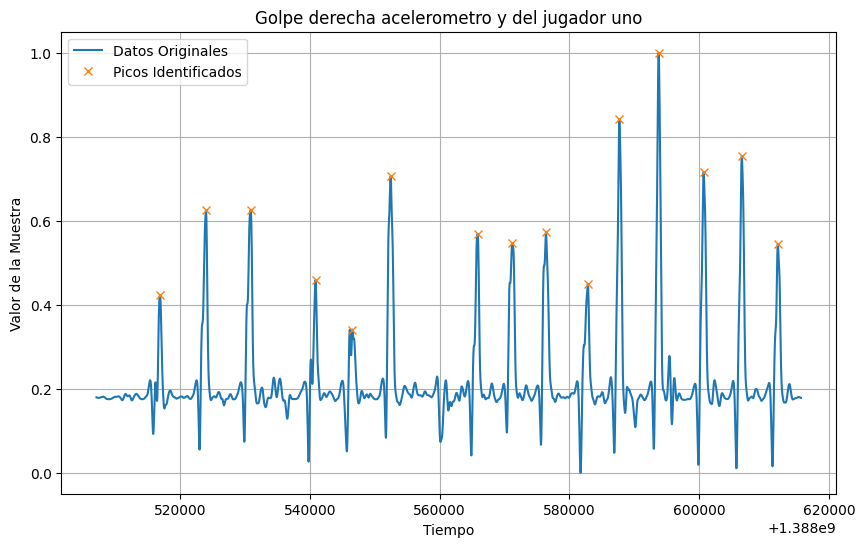

In [91]:

peaks = analyze_signal(array_serve, 'ACC_X')

Media de la señal: 0.37855344854791795
Altura del pico: 0.12459279676596599
Distancia media entre picos: 336.07142857142856
Número total de golpes: 15


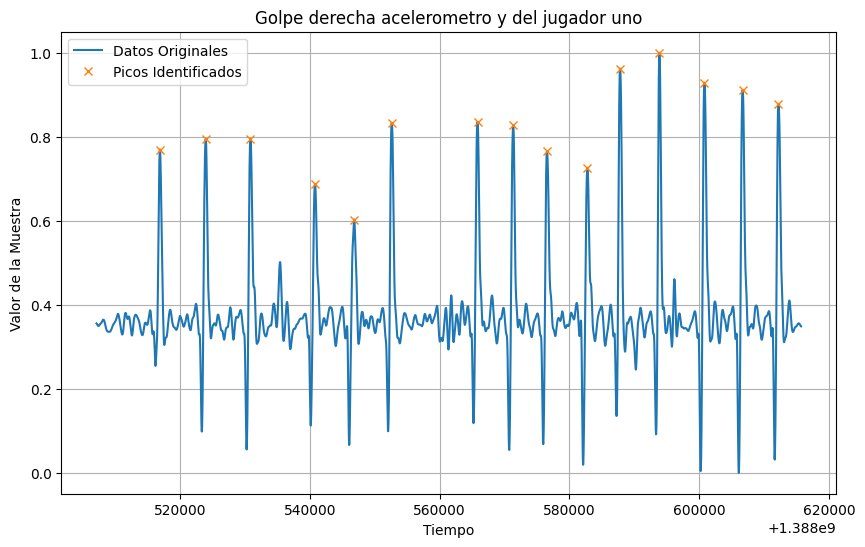

In [92]:
peaks = analyze_signal(array_serve, 'ACC_Y')

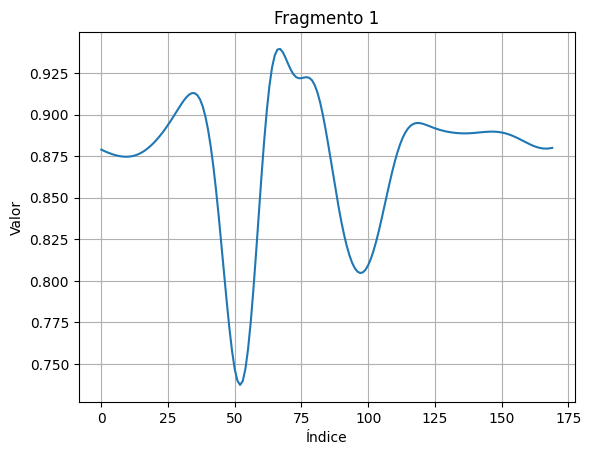

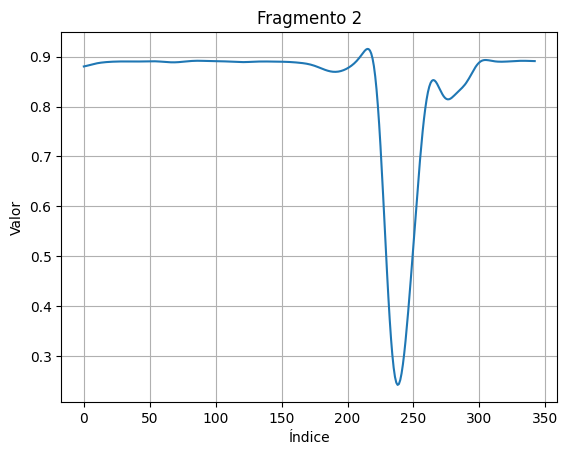

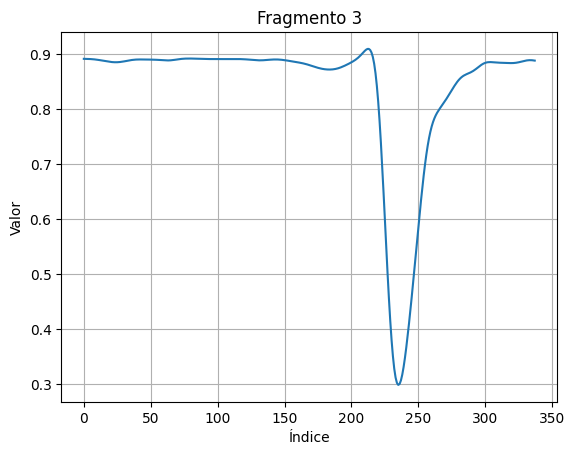

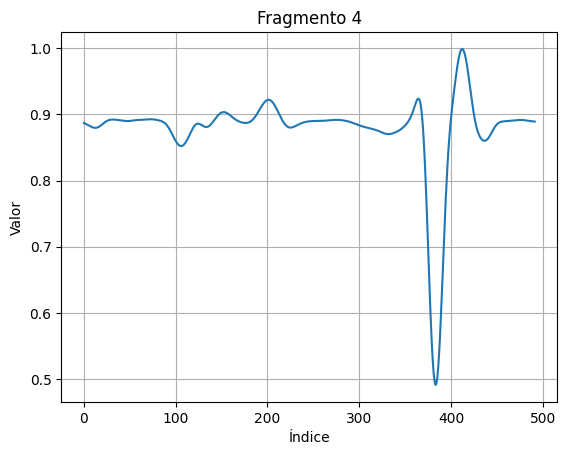

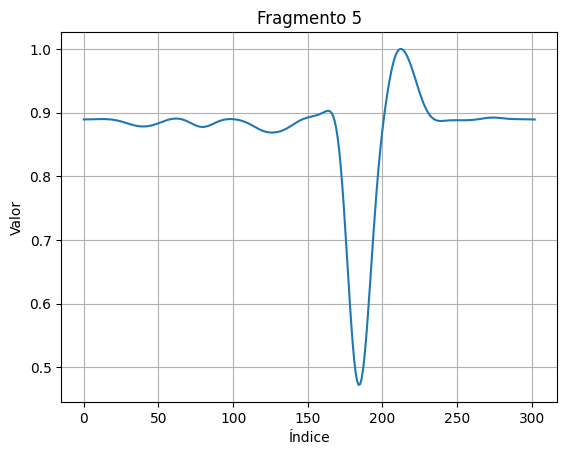

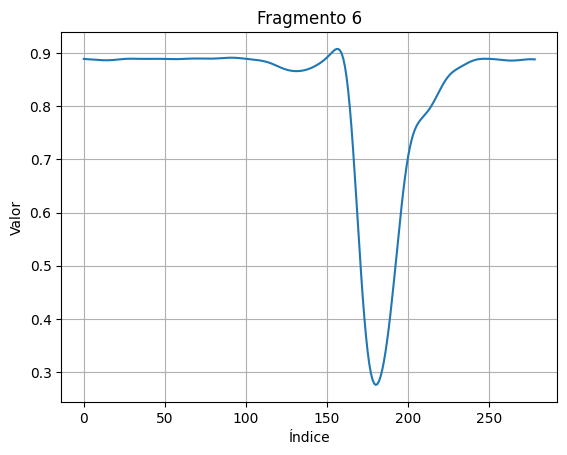

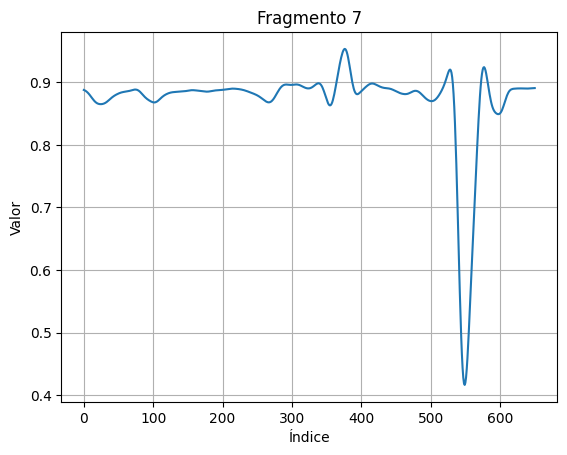

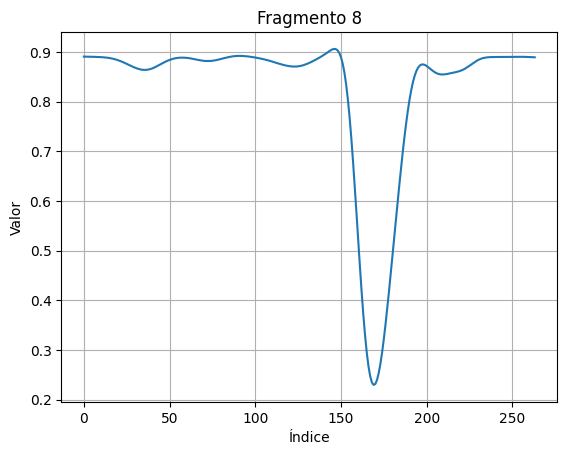

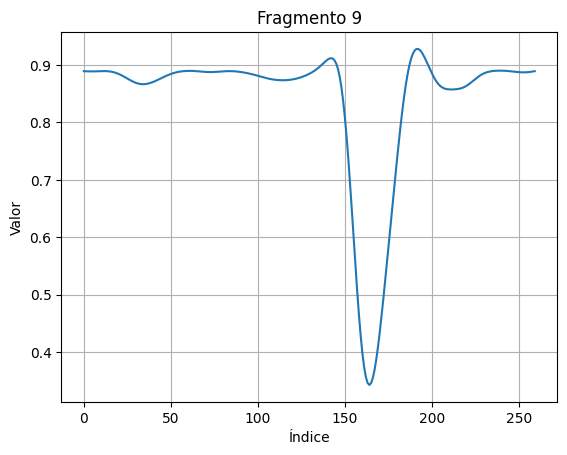

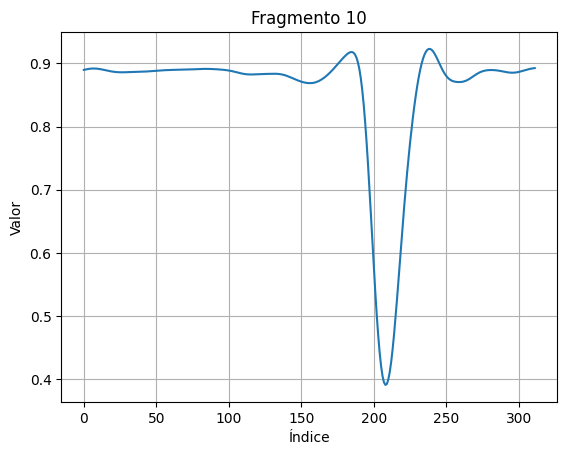

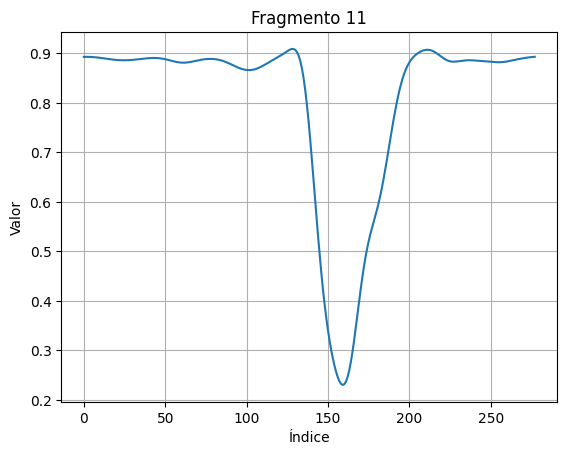

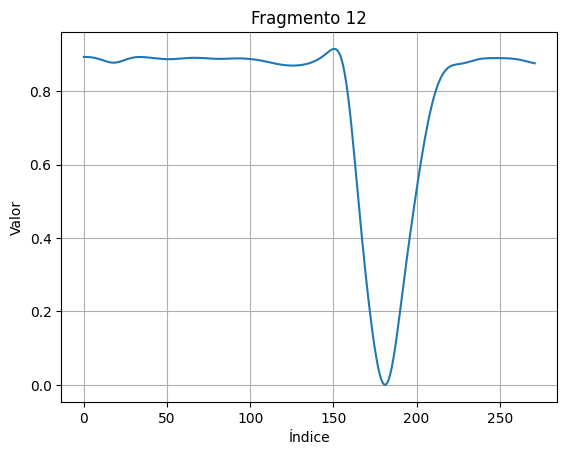

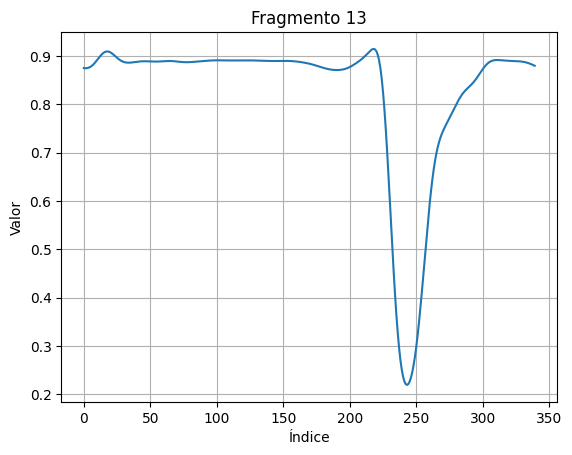

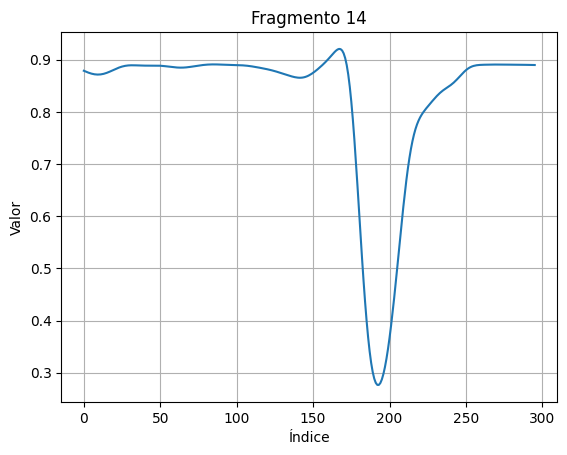

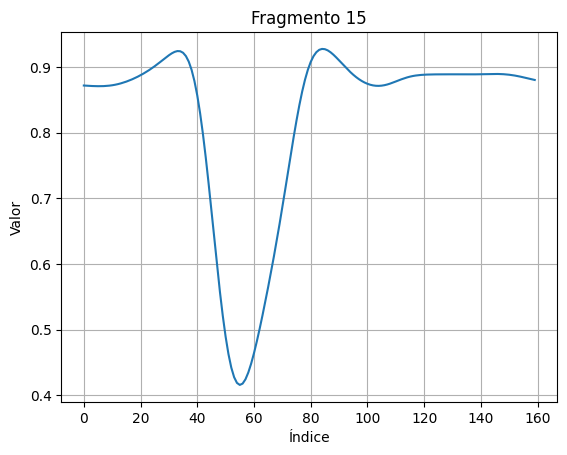

In [93]:
fragments = []

# Fragmentar la señal alrededor de cada pico y plotear cada fragmento
for i, peak_index in enumerate(peaks):
    print 
    if i == 0:
        start_index = peak_index - int(distances_between_peaks[i] / 2)
        end_index = peak_index + int(distances_between_peaks[i] / 2)
    elif i == len(peaks)-1:
        start_index = peak_index - int(distances_between_peaks[i-1] / 2)
        end_index = peak_index + int(distances_between_peaks[i-1] / 2)
    else:
        start_index = peaks[i-1] + int(distances_between_peaks[i-1] / 2)
        end_index = peak_index + int(distances_between_peaks[i] / 2)
    fragment = array_serve[start_index:end_index]
    
    # Obtener la segunda columna de cada fragmento
    fragment_values = fragment['ACC_Z']
    
    # Plotear el fragmento
    plt.figure()
    plt.plot(fragment_values)
    plt.title(f"Fragmento {i+1}")
    plt.xlabel("Índice")
    plt.ylabel("Valor")
    plt.grid(True)
    plt.show()
    
    fragments.append(fragment)
    
    


In [94]:

# # Directorio donde se guardarán los archivos CSV
# directory = "C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/fragmentos"

# # Si el directorio no existe, créalo
# if not os.path.exists(directory):
#     os.makedirs(directory)

# # Itera sobre los fragmentos y guárdalos como archivos CSV
# for i, fragment in enumerate(fragments):
#     # Nombre del archivo CSV
#     filename = os.path.join(directory, f"serve_J1_{i+1}.csv")
    
#     # Abre el archivo CSV en modo escritura
#     with open(filename, mode='w', newline='') as file:
#         writer = csv.writer(file)
        
#         # Escribe los datos del fragmento en el archivo CSV
#         for row in fragment:
#             writer.writerow(row)

# SMASH ACC

Media de la señal: 0.5050700396231624
Altura del pico: 0.097540092777573
Distancia media entre picos: 198.71428571428572
Número total de golpes: 15


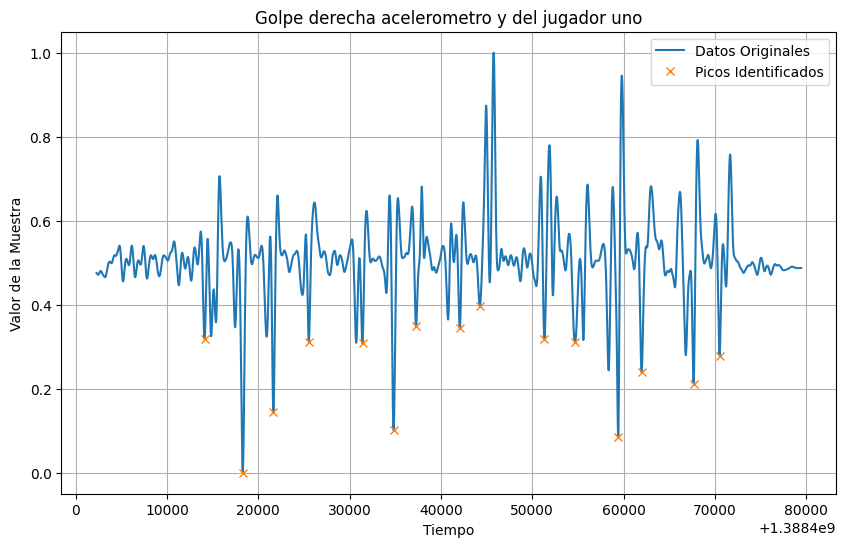

In [95]:

peaks = analyze_signal(array_smash, 'ACC_X')

Media de la señal: 0.5670280072260262
Altura del pico: 0.08480626601697039
Distancia media entre picos: 228.41666666666666
Número total de golpes: 13


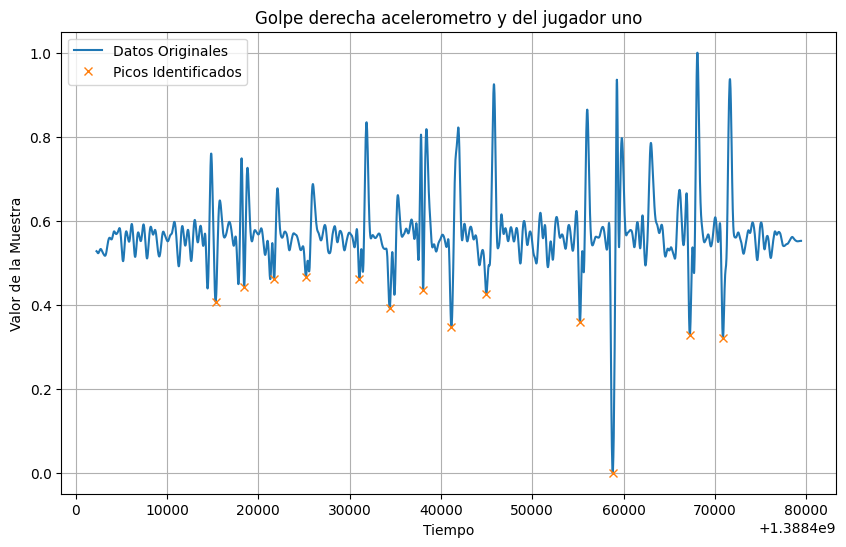

In [96]:
peaks = analyze_signal(array_smash, 'ACC_Y')

Media de la señal: 0.5595755190120315
Altura del pico: 0.07814709521163848
Distancia media entre picos: 229.58333333333334
Número total de golpes: 13


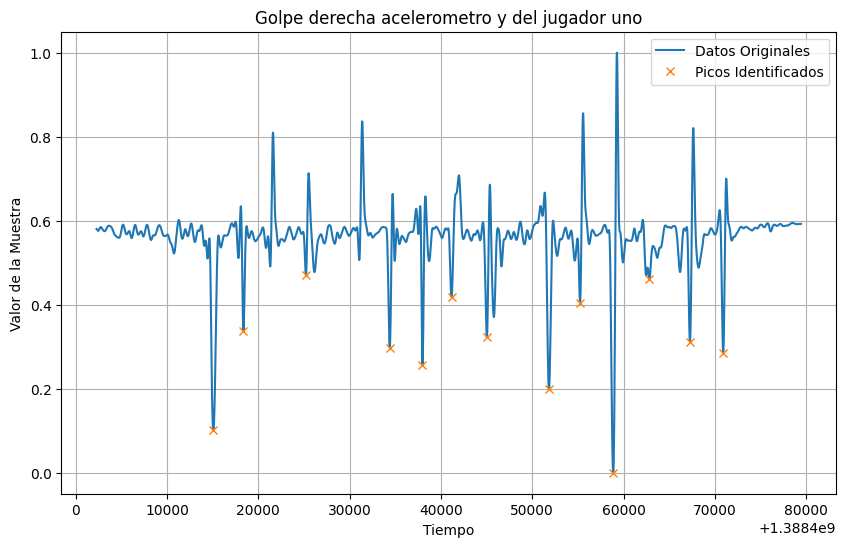

In [97]:
peaks = analyze_signal(array_smash, 'ACC_Z')

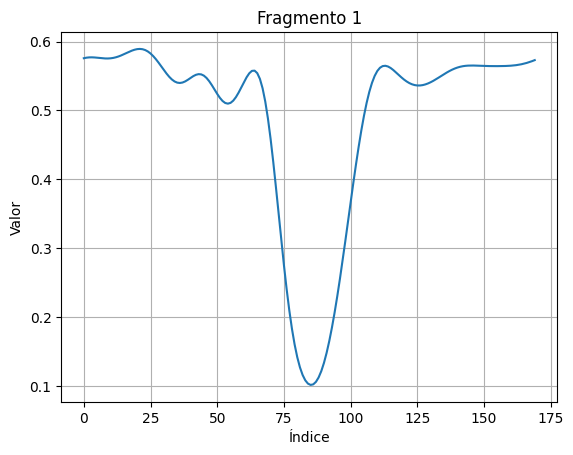

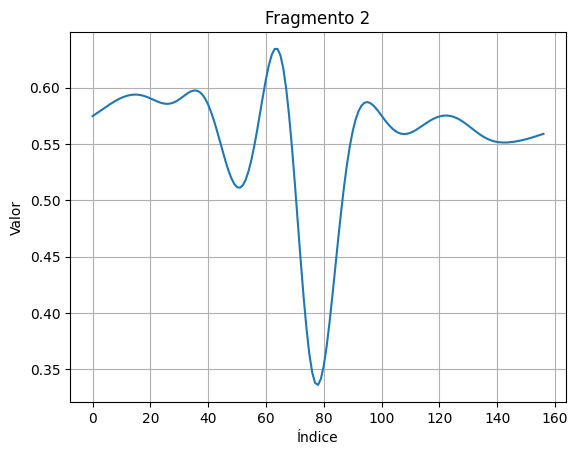

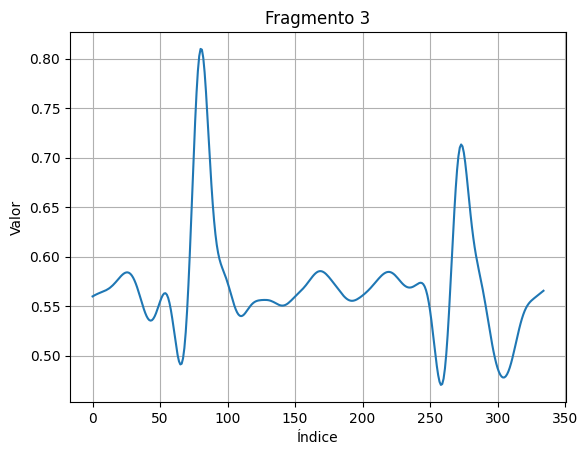

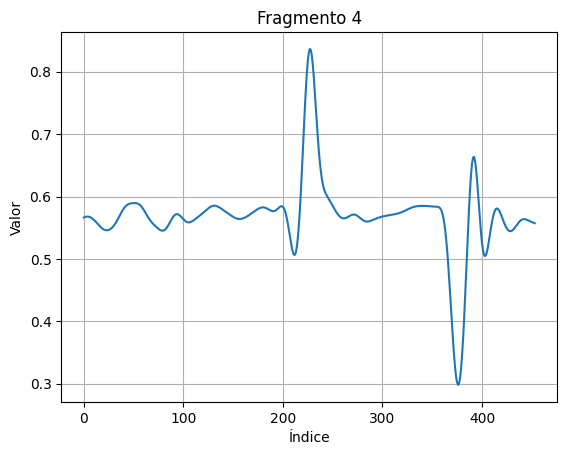

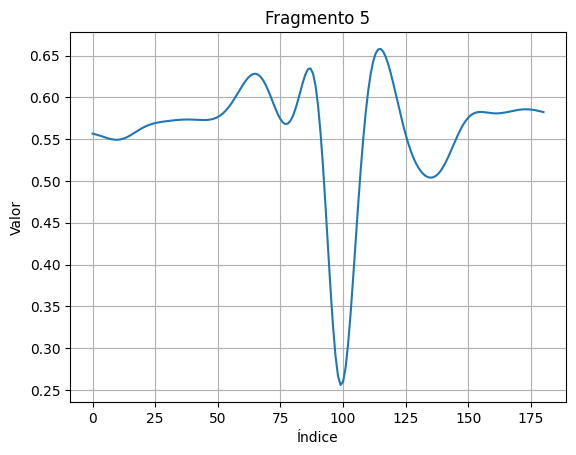

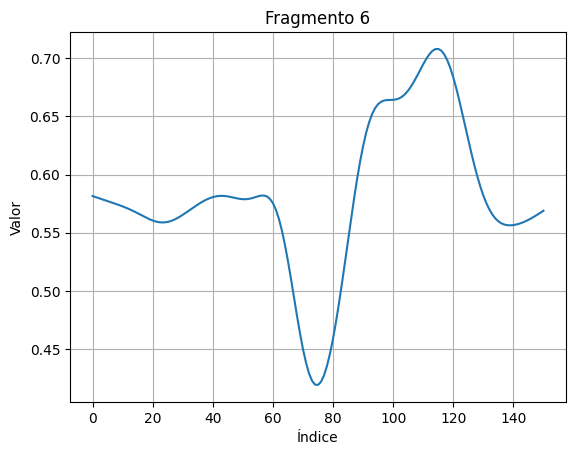

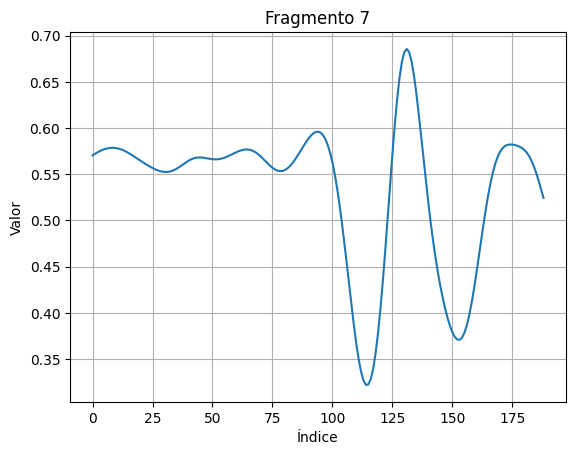

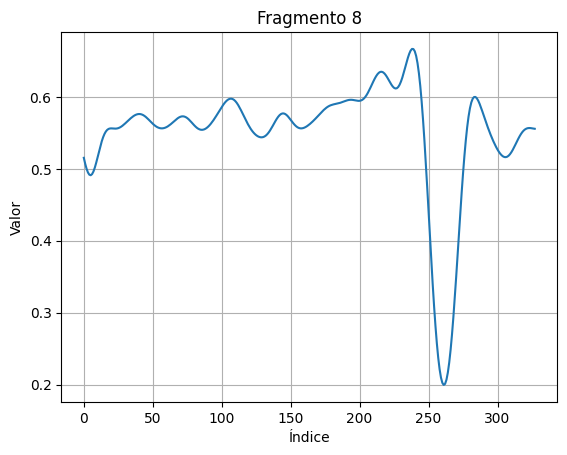

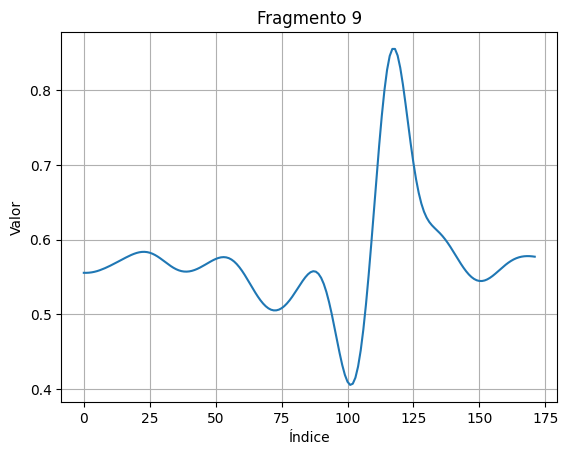

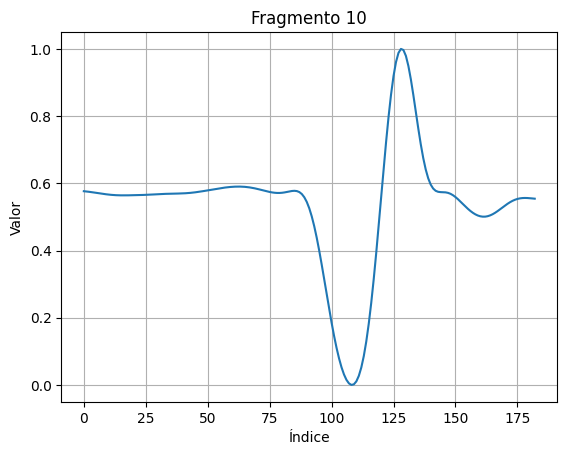

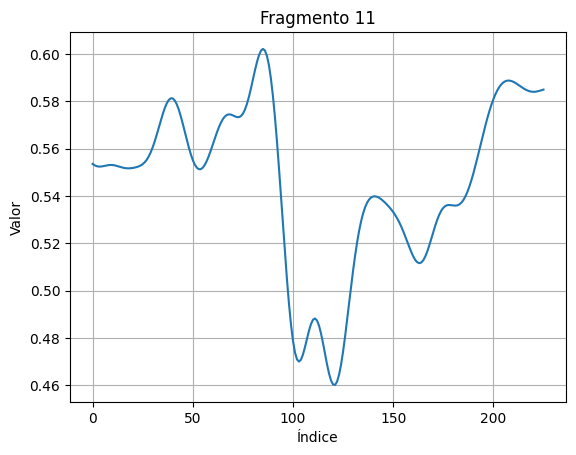

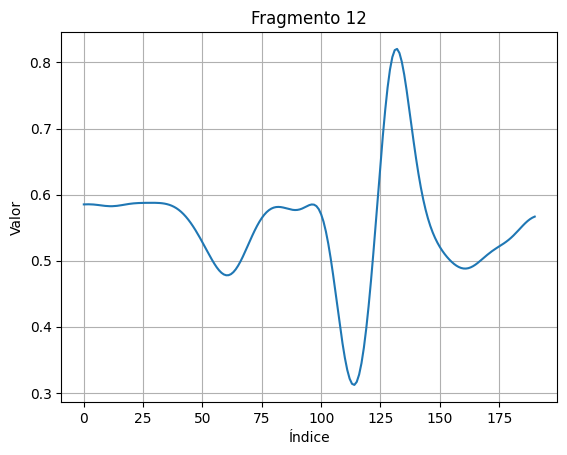

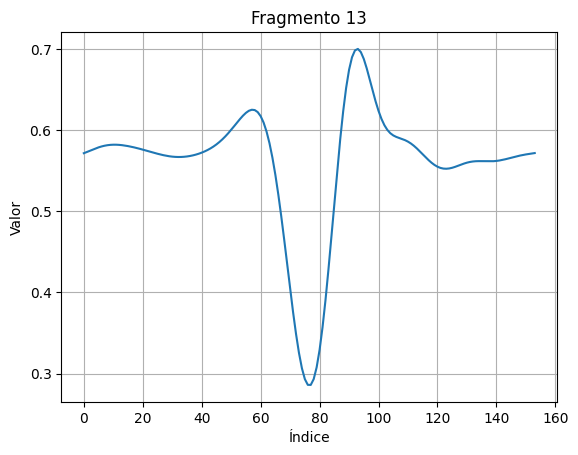

In [98]:
fragments = []

# Fragmentar la señal alrededor de cada pico y plotear cada fragmento
for i, peak_index in enumerate(peaks):
    print 
    if i == 0:
        start_index = peak_index - int(distances_between_peaks[i] / 2)
        end_index = peak_index + int(distances_between_peaks[i] / 2)
    elif i == len(peaks)-1:
        start_index = peak_index - int(distances_between_peaks[i-1] / 2)
        end_index = peak_index + int(distances_between_peaks[i-1] / 2)
    else:
        start_index = peaks[i-1] + int(distances_between_peaks[i-1] / 2)
        end_index = peak_index + int(distances_between_peaks[i] / 2)
    fragment = array_smash[start_index:end_index]
    
    # Obtener la segunda columna de cada fragmento
    fragment_values = fragment['ACC_Z']
    
    # Plotear el fragmento
    plt.figure()
    plt.plot(fragment_values)
    plt.title(f"Fragmento {i+1}")
    plt.xlabel("Índice")
    plt.ylabel("Valor")
    plt.grid(True)
    plt.show()
    
    fragments.append(fragment)
    
    


In [99]:

# # Directorio donde se guardarán los archivos CSV
# directory = "C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/fragmentos"

# # Si el directorio no existe, créalo
# if not os.path.exists(directory):
#     os.makedirs(directory)

# # Itera sobre los fragmentos y guárdalos como archivos CSV
# for i, fragment in enumerate(fragments):
#     # Nombre del archivo CSV
#     filename = os.path.join(directory, f"smash_J1_{i+1}.csv")
    
#     # Abre el archivo CSV en modo escritura
#     with open(filename, mode='w', newline='') as file:
#         writer = csv.writer(file)
        
#         # Escribe los datos del fragmento en el archivo CSV
#         for row in fragment:
#             writer.writerow(row)

# VOLEA DERECHA ACC

Media de la señal: 0.6485429762504952
Altura del pico: 0.11620707751111888
Distancia media entre picos: 185.4
Número total de golpes: 11


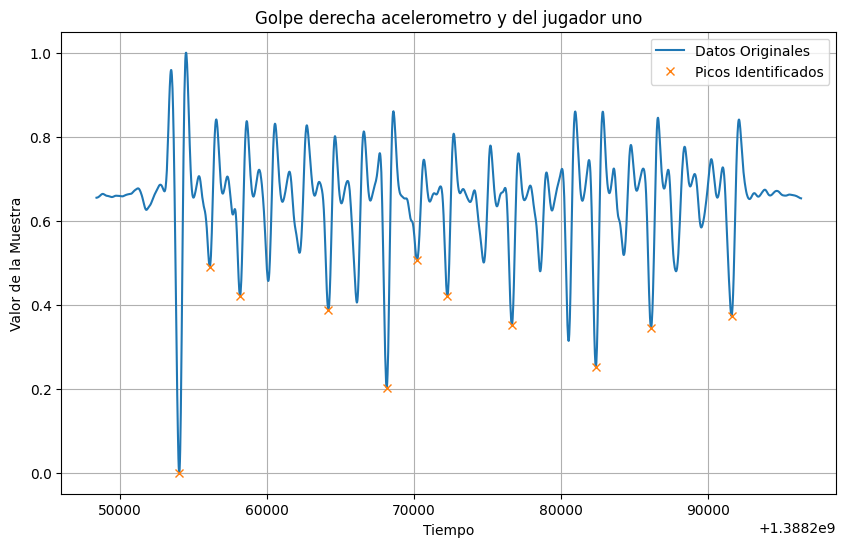

In [100]:
peaks = analyze_signal(array_vd, 'ACC_X')

Media de la señal: 0.37878259009834003
Altura del pico: 0.11912718411098855
Distancia media entre picos: 206.11111111111111
Número total de golpes: 10


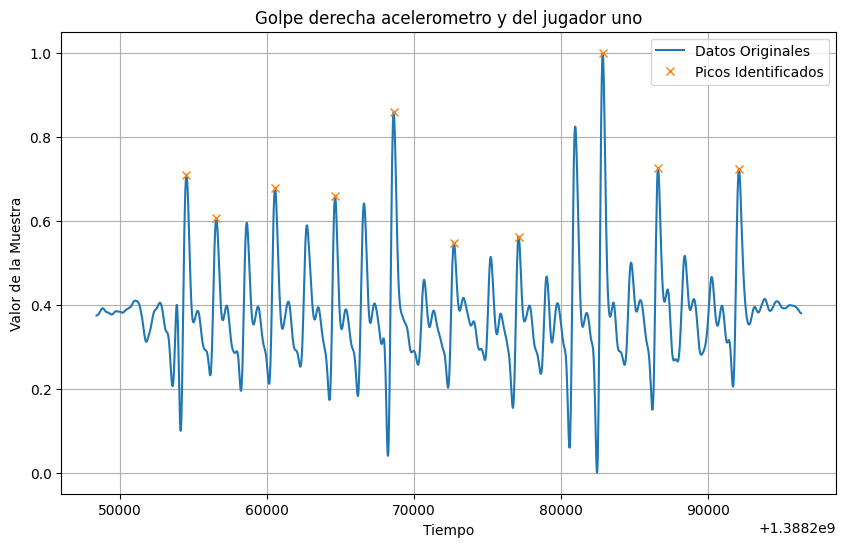

In [101]:
peaks = analyze_signal(array_vd, 'ACC_Y')

Media de la señal: 0.23905001111881155
Altura del pico: 0.12217198473937535
Distancia media entre picos: 168.8181818181818
Número total de golpes: 12


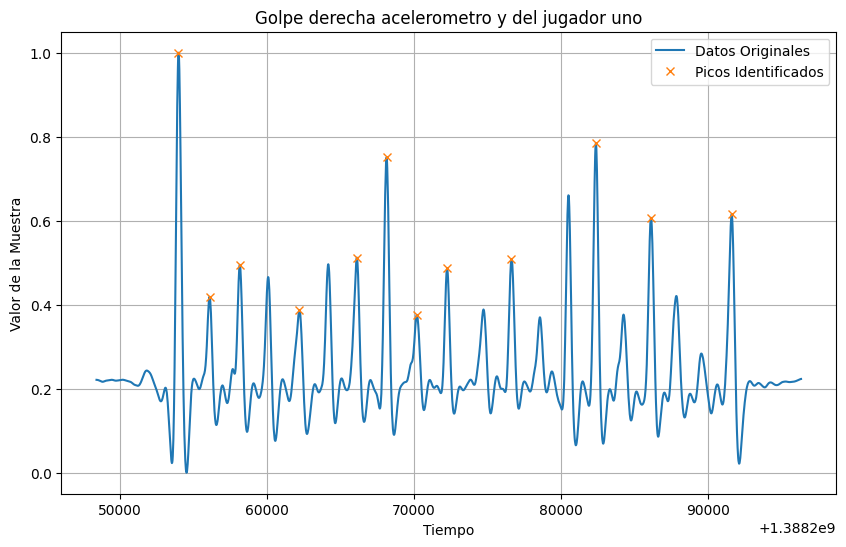

In [102]:
peaks = analyze_signal(array_vd, 'ACC_Z')

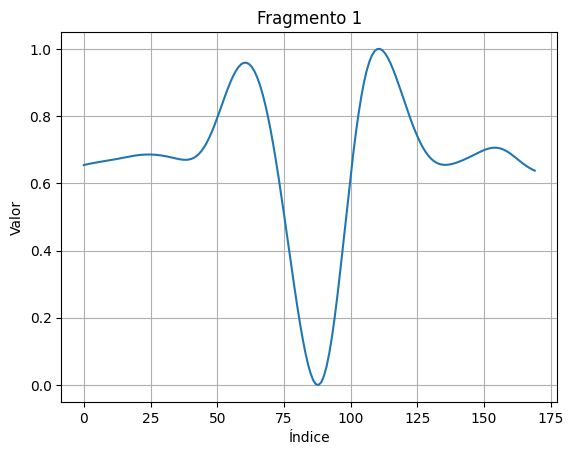

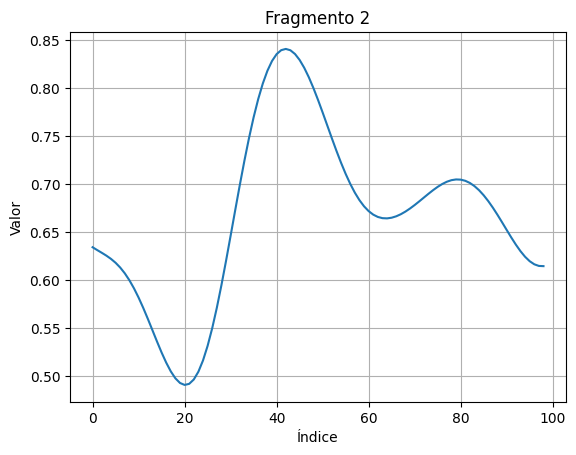

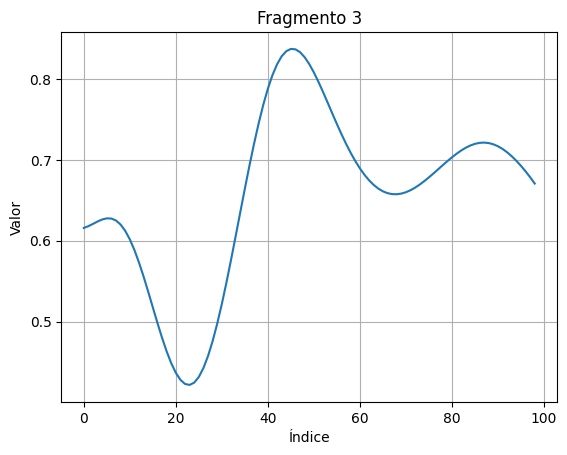

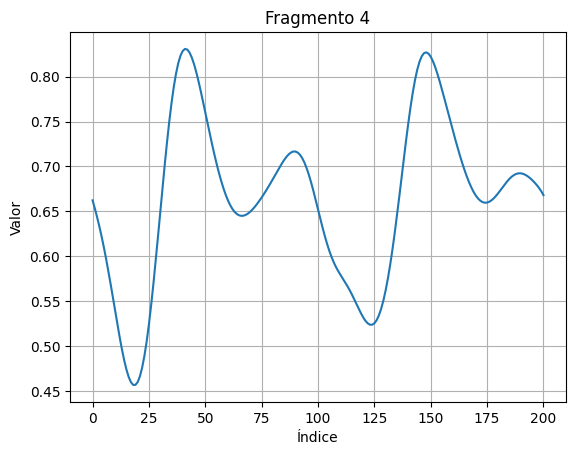

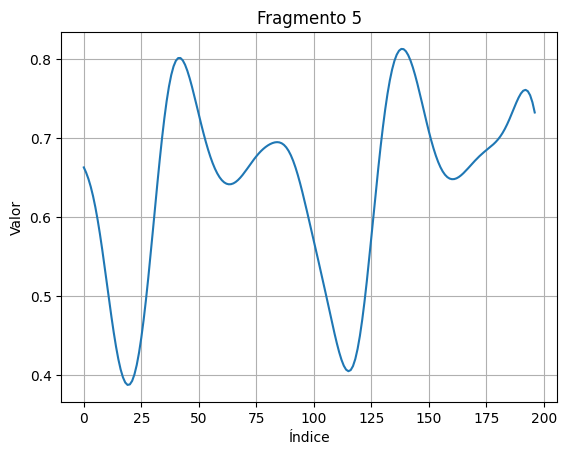

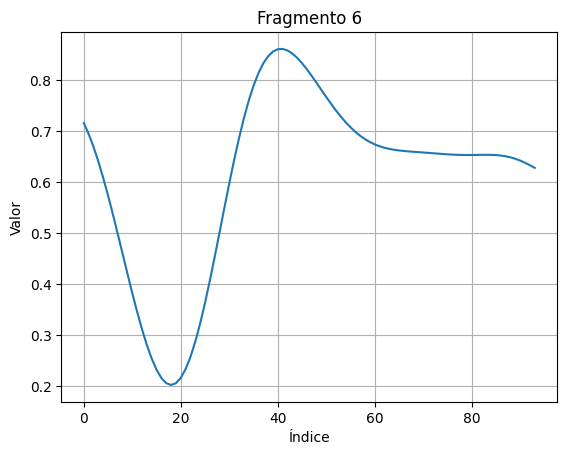

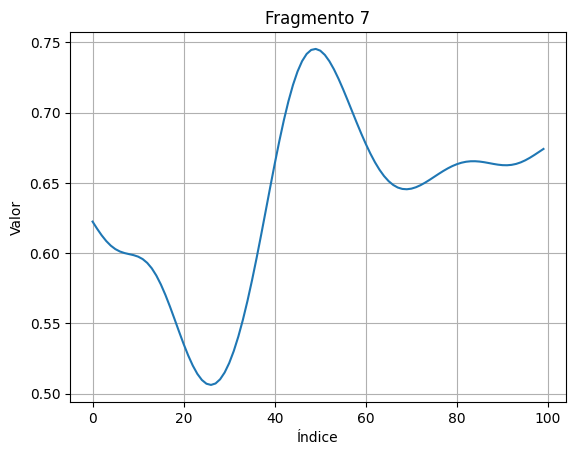

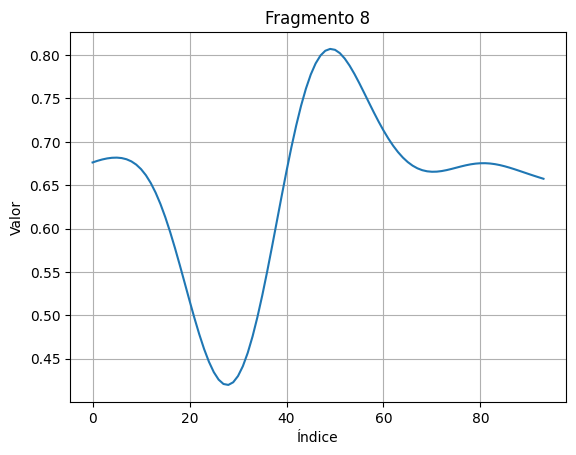

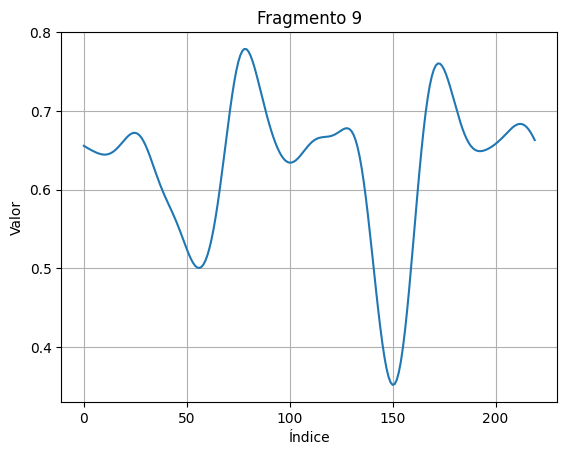

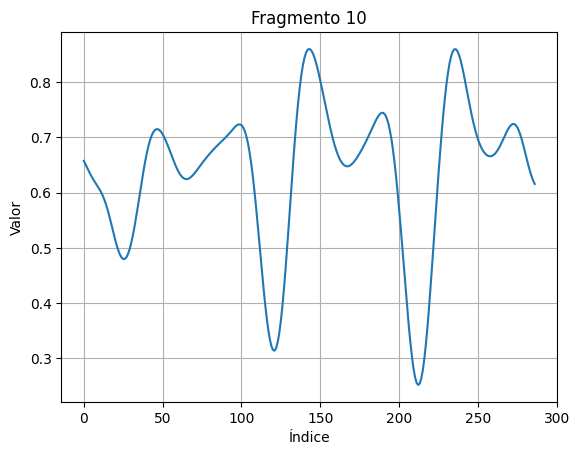

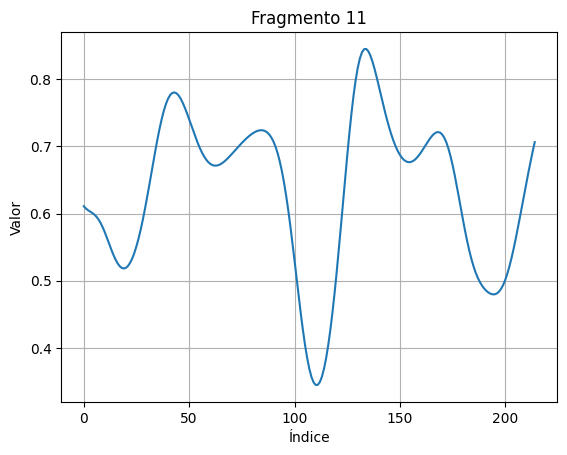

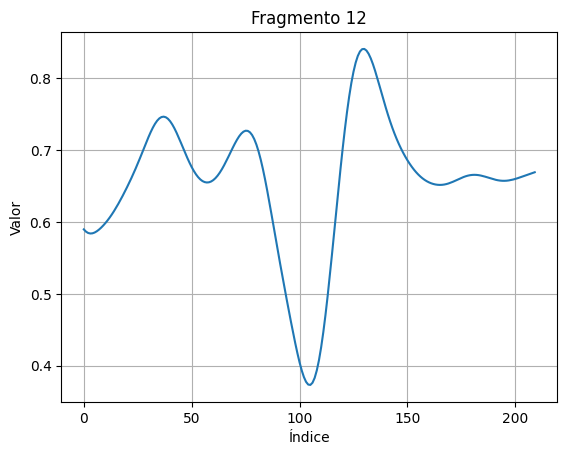

In [103]:
fragments = []

# Fragmentar la señal alrededor de cada pico y plotear cada fragmento
for i, peak_index in enumerate(peaks):
    print 
    if i == 0:
        start_index = peak_index - int(distances_between_peaks[i] / 2)
        end_index = peak_index + int(distances_between_peaks[i] / 2)
    elif i == len(peaks)-1:
        start_index = peak_index - int(distances_between_peaks[i-1] / 2)
        end_index = peak_index + int(distances_between_peaks[i-1] / 2)
    else:
        start_index = peaks[i-1] + int(distances_between_peaks[i-1] / 2)
        end_index = peak_index + int(distances_between_peaks[i] / 2)
    fragment = array_vd[start_index:end_index]
    
    # Obtener la segunda columna de cada fragmento
    fragment_values = fragment['ACC_X']
    
    # Plotear el fragmento
    plt.figure()
    plt.plot(fragment_values)
    plt.title(f"Fragmento {i+1}")
    plt.xlabel("Índice")
    plt.ylabel("Valor")
    plt.grid(True)
    plt.show()
    
    fragments.append(fragment)
    

In [104]:

    

# # Directorio donde se guardarán los archivos CSV
# directory = "C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/fragmentos"

# # Si el directorio no existe, créalo
# if not os.path.exists(directory):
#     os.makedirs(directory)

# # Itera sobre los fragmentos y guárdalos como archivos CSV
# for i, fragment in enumerate(fragments):
#     # Nombre del archivo CSV
#     filename = os.path.join(directory, f"vd_J1_{i+1}.csv")
    
#     # Abre el archivo CSV en modo escritura
#     with open(filename, mode='w', newline='') as file:
#         writer = csv.writer(file)
        
#         # Escribe los datos del fragmento en el archivo CSV
#         for row in fragment:
#             writer.writerow(row)

# VOLEA REVES

Media de la señal: 0.4979278490914397
Altura del pico: 0.10443192962818972
Distancia media entre picos: 188.92857142857142
Número total de golpes: 15


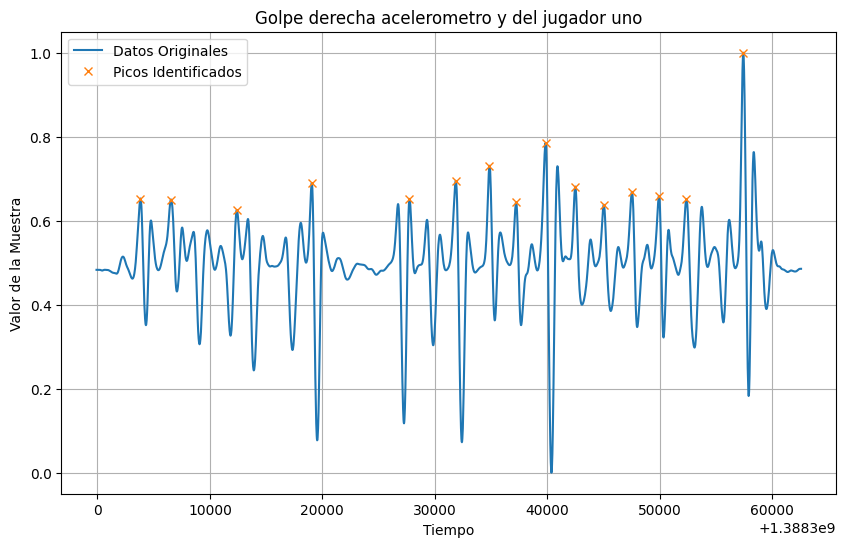

In [105]:
peaks = analyze_signal(array_vr, 'ACC_X')

Media de la señal: 0.4550053494769826
Altura del pico: 0.09815775777242652
Distancia media entre picos: 220.16666666666666
Número total de golpes: 13


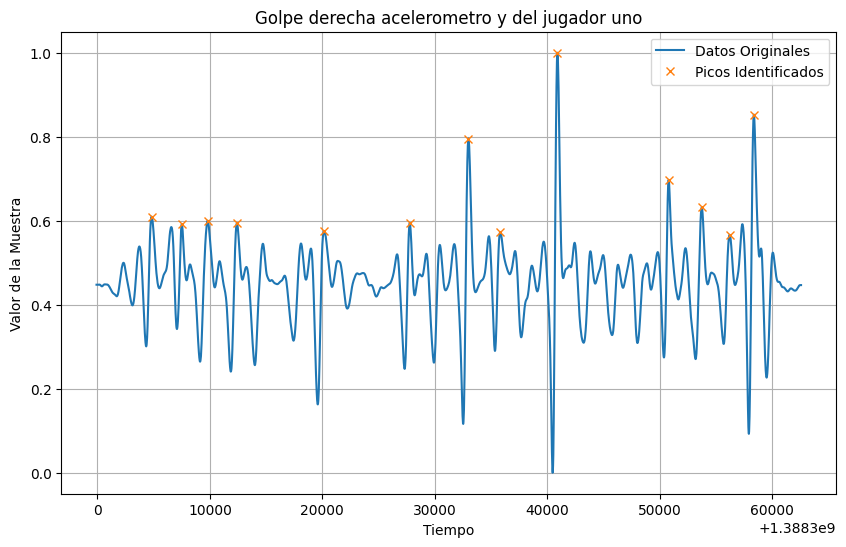

In [106]:
peaks = analyze_signal(array_vr, 'ACC_Y')

Media de la señal: 0.7759186506748291
Altura del pico: 0.09225544277784112
Distancia media entre picos: 198.91666666666666
Número total de golpes: 13


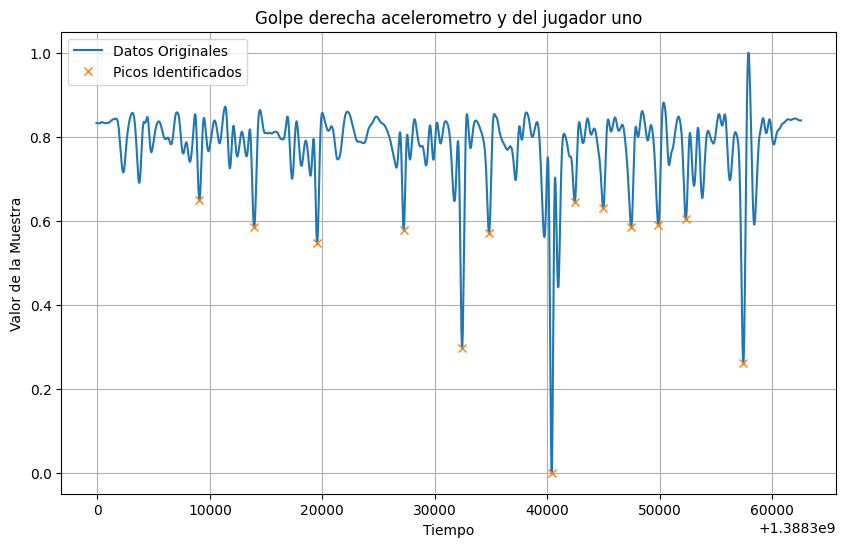

In [107]:
peaks = analyze_signal(array_vr, 'ACC_Z')

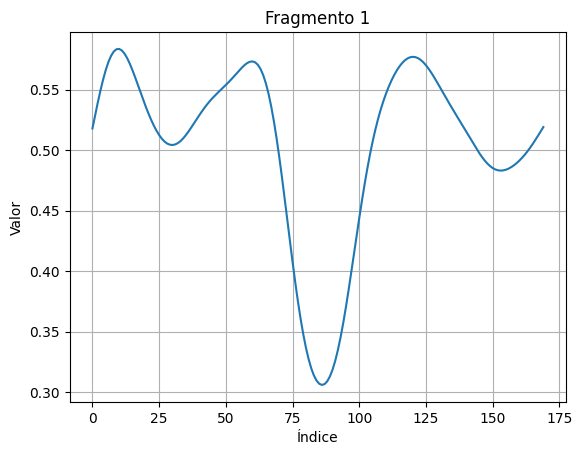

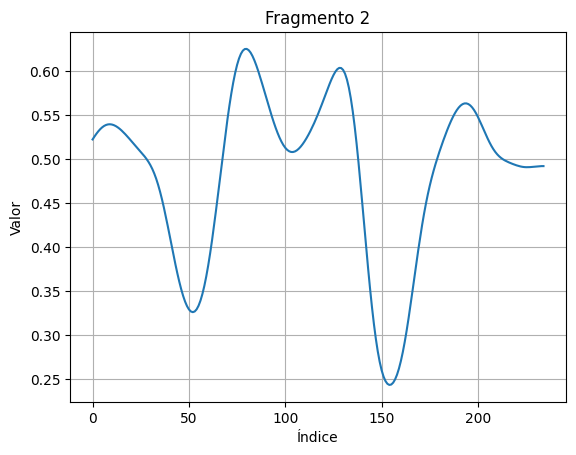

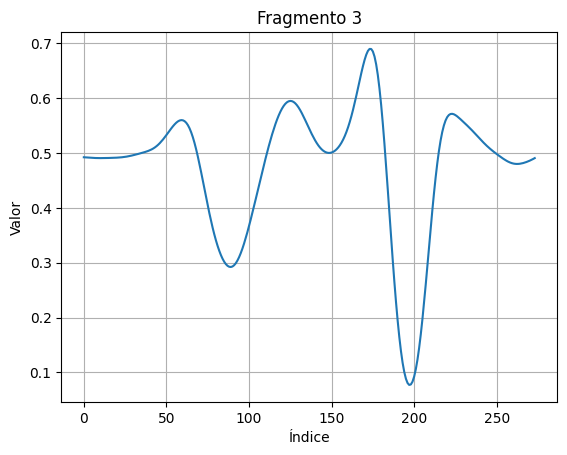

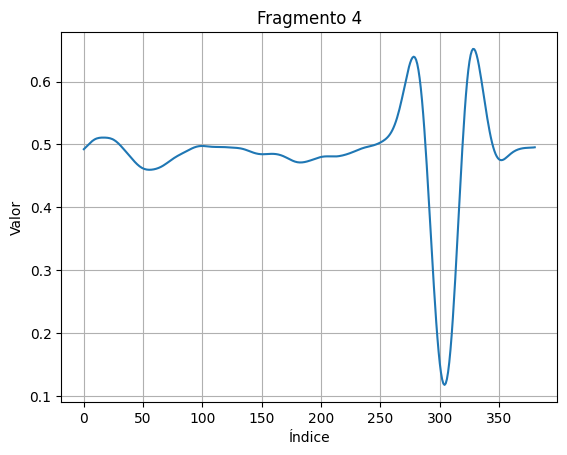

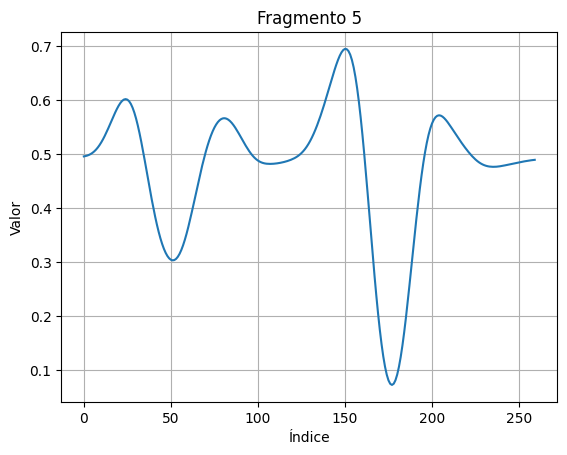

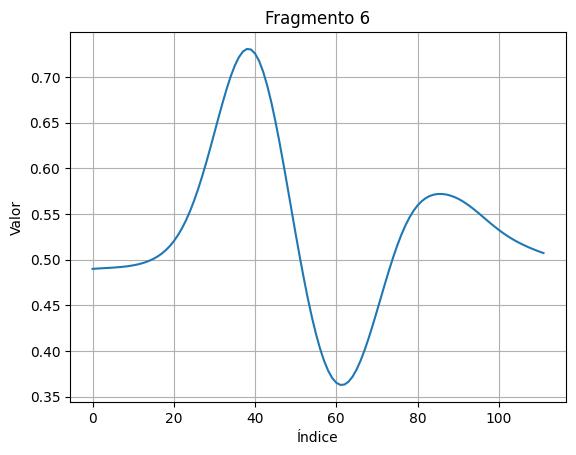

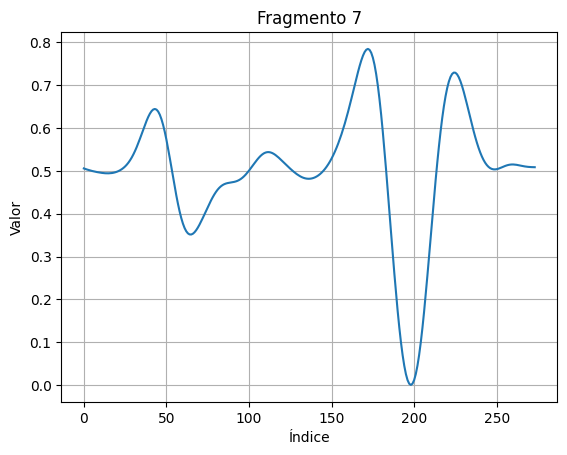

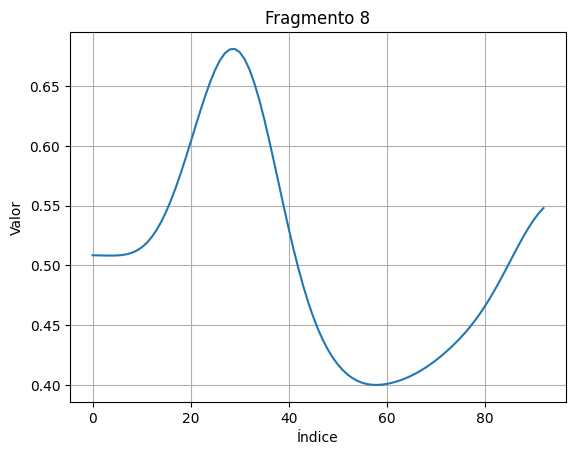

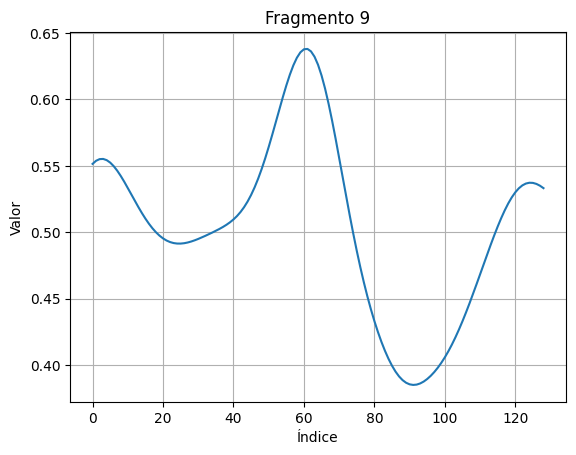

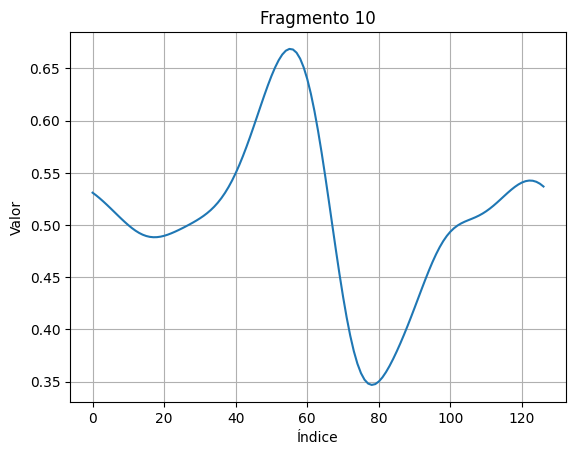

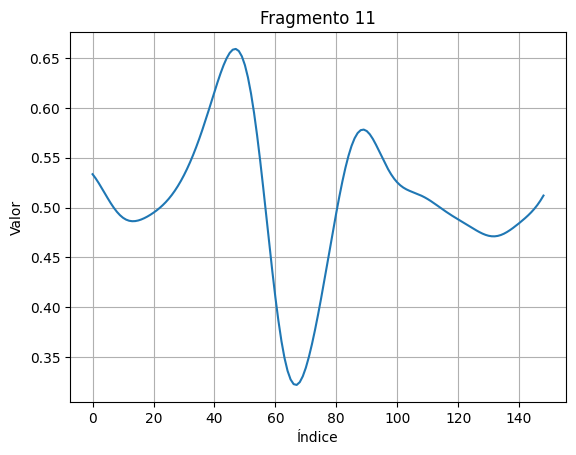

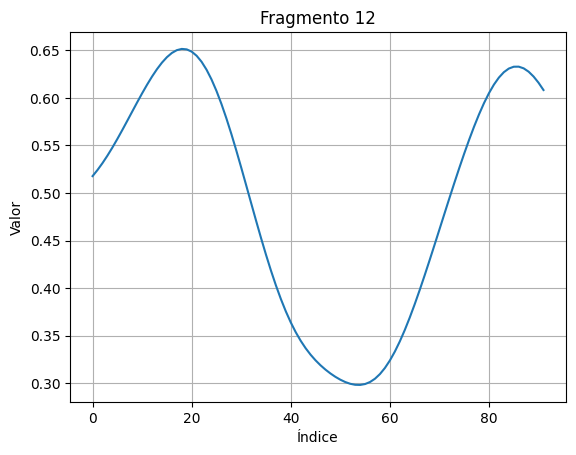

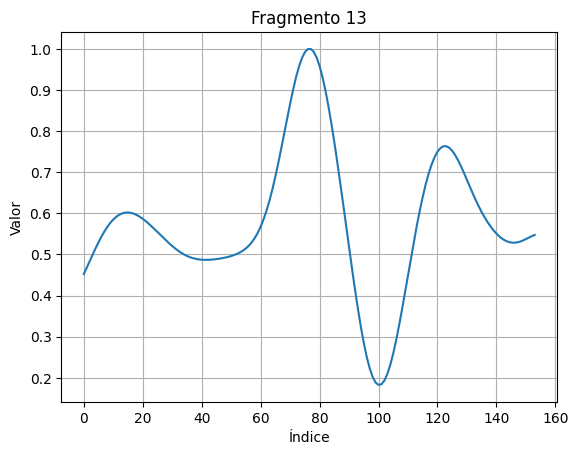

In [108]:
fragments = []

# Fragmentar la señal alrededor de cada pico y plotear cada fragmento
for i, peak_index in enumerate(peaks):
    print 
    if i == 0:
        start_index = peak_index - int(distances_between_peaks[i] / 2)
        end_index = peak_index + int(distances_between_peaks[i] / 2)
    elif i == len(peaks)-1:
        start_index = peak_index - int(distances_between_peaks[i-1] / 2)
        end_index = peak_index + int(distances_between_peaks[i-1] / 2)
    else:
        start_index = peaks[i-1] + int(distances_between_peaks[i-1] / 2)
        end_index = peak_index + int(distances_between_peaks[i] / 2)
    fragment = array_vr[start_index:end_index]
    
    # Obtener la segunda columna de cada fragmento
    fragment_values = fragment['ACC_X']
    
    # Plotear el fragmento
    plt.figure()
    plt.plot(fragment_values)
    plt.title(f"Fragmento {i+1}")
    plt.xlabel("Índice")
    plt.ylabel("Valor")
    plt.grid(True)
    plt.show()
    
    fragments.append(fragment)
    
    



In [109]:
# # Directorio donde se guardarán los archivos CSV
# directory = "C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/fragmentos"

# # Si el directorio no existe, créalo
# if not os.path.exists(directory):
#     os.makedirs(directory)

# # Itera sobre los fragmentos y guárdalos como archivos CSV
# for i, fragment in enumerate(fragments):
#     # Nombre del archivo CSV
#     filename = os.path.join(directory, f"vr_J1_{i+1}.csv")
    
#     # Abre el archivo CSV en modo escritura
#     with open(filename, mode='w', newline='') as file:
#         writer = csv.writer(file)
        
#         # Escribe los datos del fragmento en el archivo CSV
#         for row in fragment:
#             writer.writerow(row)